In [48]:
import warnings 
import pandas as pd 
import numpy as np 
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

from sklearn import preprocessing 
from sklearn import tree 
from sklearn.manifold import TSNE 
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn import metrics 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import scipy
from scipy import stats
from sklearn.ensemble import IsolationForest
 
 
pd.set_option('display.max_columns',None) 
warnings.filterwarnings('ignore') 
%matplotlib inline

Базовый исследовательский анализ 


Первые несколько строк набора данных:
   Temperature  Vibration  Power_Usage   Humidity Machine_Type  Failure_Risk
0    74.967142  56.996777     8.649643  20.460962         Mill             1
1    68.617357  54.623168     9.710963  25.698075        Lathe             0
2    76.476885  50.298152     8.415160  27.931972        Drill             1
3    85.230299  46.765316     9.384077  39.438438        Lathe             1
4    67.658466  53.491117     6.212771  32.782766        Drill             1

Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null   float64
 4   Machine_Type  1000 non-null   object 
 5   Failure_Risk  1000 non-null   int64  
dtypes: float64(4), i

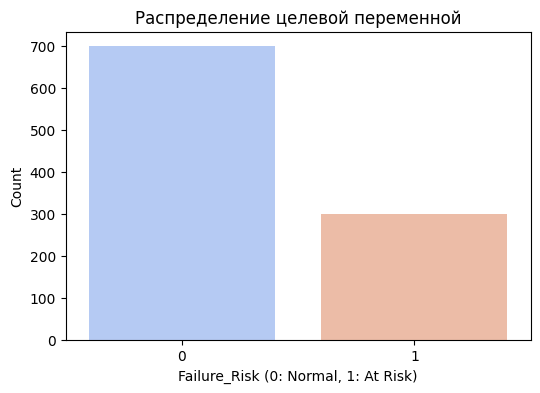


Descriptive Statistics for Numerical Columns:
       Temperature    Vibration  Power_Usage     Humidity  Failure_Risk
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000
mean     70.193321    50.354181    10.011668    29.906404      0.300000
std       9.792159     4.987272     1.966909     5.135663      0.458487
min      37.587327    35.298057     3.960976    15.352757      0.000000
25%      63.524097    46.968792     8.704001    26.312898      0.000000
50%      70.253006    50.315386     9.999498    30.000923      0.000000
75%      76.479439    53.644411    11.321831    33.334727      1.000000
max     108.527315    65.965538    17.852475    46.215465      1.000000


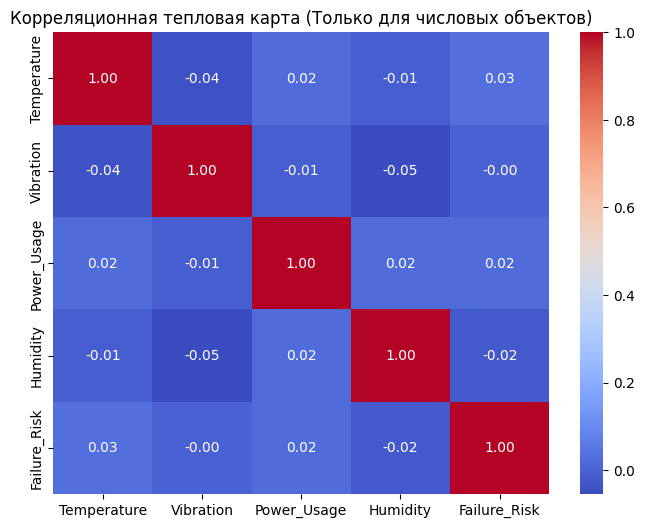

In [50]:
# Загрузка данных и первичный анализ датасета

data = pd.read_csv("machine_failure_dataset.csv")

# Отображение первых нескольких строк набора данных
print("\nПервые несколько строк набора данных:")
print(data.head())

# Основная информация о наборе данных
print("\nИнформация о наборе данных:")
print(data.info())

# Проверка пропущенных значений
print("\nПропущенные значения:")
print(data.isnull().sum())

# Описательная статистика для числовых характеристик
print("\nОписательная статистика:")
print(data.describe())

# Обзор категориальных характеристик (тип машины)
print("\nУникальные значения в 'Machine_Type':")
print(data['Machine_Type'].unique())

# Распределение целевой переменной (Failure Risk)
print("\nРаспределение целевой переменной (Failure_Risk):")
print(data['Failure_Risk'].value_counts())

# Визуализация распределения целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(x='Failure_Risk', data=data, palette='coolwarm')
plt.title('Распределение целевой переменной')
plt.xlabel('Failure_Risk (0: Normal, 1: At Risk)')
plt.ylabel('Count')
plt.show()
# Описательная статистика для числовых объектов
# Исключаем нечисловые столбцы
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("\nDescriptive Statistics for Numerical Columns:")
print(data[numeric_columns].describe())
# Корреляционная тепловая карта только для числовых объектов
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная тепловая карта (Только для числовых объектов)')
plt.show()


=== Структура датасета ===

1. Temperature (°C):
Тип: float64
Диапазон значений: от 37.6°C до 108.5°C
Среднее значение: 70.2°C
Стандартное отклонение: 9.8°C

2. Vibration (Hz):
Тип: float64
Диапазон значений: от 35.3 Hz до 66.0 Hz
Среднее значение: 50.4 Hz
Стандартное отклонение: 5.0 Hz

3. Power_Usage (kW):
Тип: float64
Диапазон значений: от 4.0 kW до 17.9 kW
Среднее значение: 10.0 kW
Стандартное отклонение: 2.0 kW

4. Humidity (%):
Тип: float64
Диапазон значений: от 15.4% до 46.2%
Среднее значение: 29.9%
Стандартное отклонение: 5.1%

5. Machine_Type:
Тип: object
Распределение типов машин:
Lathe: 33.8% образцов
Drill: 33.4% образцов
Mill: 32.8% образцов

6. Failure_Risk:
Тип: int64
Распределение классов:
0: 70.0% образцов (нормальная работа)
1: 30.0% образцов (риск отказа)

=== Проверка на пропущенные значения ===
Temperature     0
Vibration       0
Power_Usage     0
Humidity        0
Machine_Type    0
Failure_Risk    0
dtype: int64


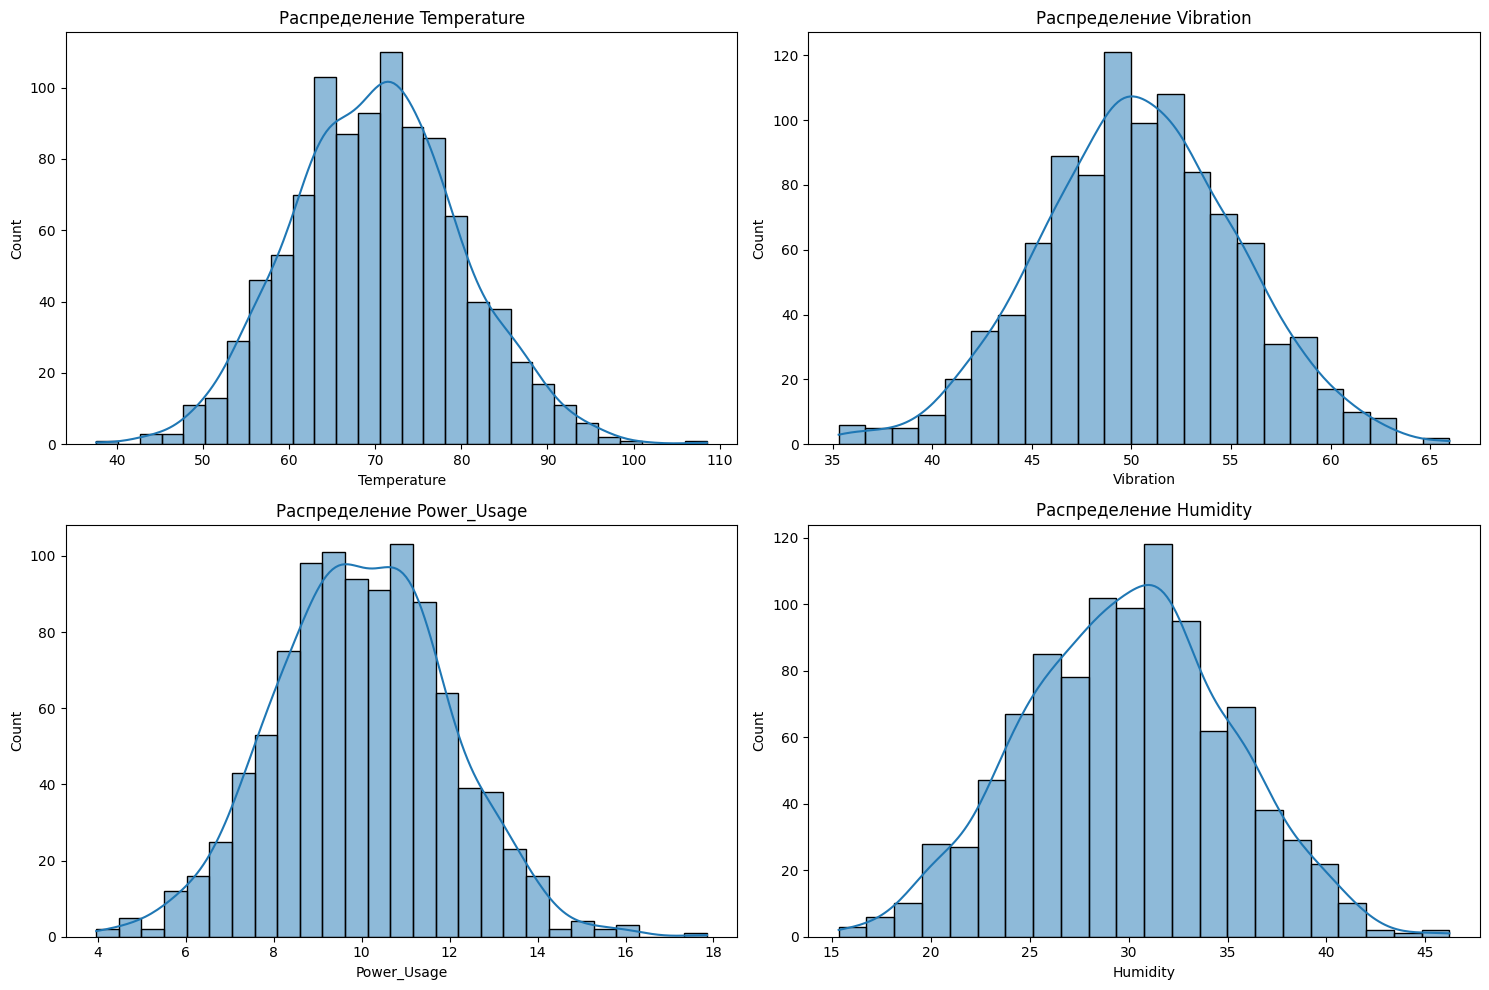

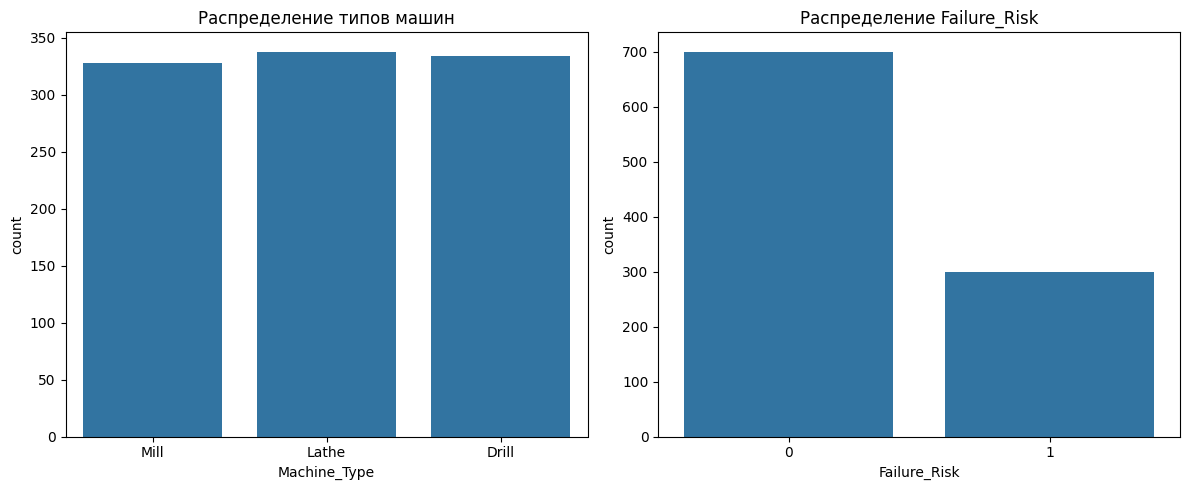

In [52]:
# 2. Проверка структуры датасета
print("\n=== Структура датасета ===")

# Проверка признака Temperature
print("\n1. Temperature (°C):")
print(f"Тип: {data['Temperature'].dtype}")
print(f"Диапазон значений: от {data['Temperature'].min():.1f}°C до {data['Temperature'].max():.1f}°C")
print(f"Среднее значение: {data['Temperature'].mean():.1f}°C")
print(f"Стандартное отклонение: {data['Temperature'].std():.1f}°C")

# Проверка признака Vibration
print("\n2. Vibration (Hz):")
print(f"Тип: {data['Vibration'].dtype}")
print(f"Диапазон значений: от {data['Vibration'].min():.1f} Hz до {data['Vibration'].max():.1f} Hz")
print(f"Среднее значение: {data['Vibration'].mean():.1f} Hz")
print(f"Стандартное отклонение: {data['Vibration'].std():.1f} Hz")

# Проверка признака Power_Usage
print("\n3. Power_Usage (kW):")
print(f"Тип: {data['Power_Usage'].dtype}")
print(f"Диапазон значений: от {data['Power_Usage'].min():.1f} kW до {data['Power_Usage'].max():.1f} kW")
print(f"Среднее значение: {data['Power_Usage'].mean():.1f} kW")
print(f"Стандартное отклонение: {data['Power_Usage'].std():.1f} kW")

# Проверка признака Humidity
print("\n4. Humidity (%):")
print(f"Тип: {data['Humidity'].dtype}")
print(f"Диапазон значений: от {data['Humidity'].min():.1f}% до {data['Humidity'].max():.1f}%")
print(f"Среднее значение: {data['Humidity'].mean():.1f}%")
print(f"Стандартное отклонение: {data['Humidity'].std():.1f}%")

# Проверка признака Machine_Type
print("\n5. Machine_Type:")
print(f"Тип: {data['Machine_Type'].dtype}")
machine_type_counts = data['Machine_Type'].value_counts(normalize=True) * 100
print("Распределение типов машин:")
for machine_type, percentage in machine_type_counts.items():
    print(f"{machine_type}: {percentage:.1f}% образцов")

# Проверка целевой переменной Failure_Risk
print("\n6. Failure_Risk:")
print(f"Тип: {data['Failure_Risk'].dtype}")
failure_distribution = data['Failure_Risk'].value_counts(normalize=True) * 100
print("Распределение классов:")
for risk, percentage in failure_distribution.items():
    print(f"{risk}: {percentage:.1f}% образцов ({'нормальная работа' if risk == 0 else 'риск отказа'})")

# Дополнительная проверка на пропущенные значения
print("\n=== Проверка на пропущенные значения ===")
print(data.isnull().sum())

# Визуализация распределений
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Распределение числовых признаков
numeric_cols = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

# Распределение категориальных признаков
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Machine_Type', data=data)
plt.title('Распределение типов машин')

plt.subplot(1, 2, 2)
sns.countplot(x='Failure_Risk', data=data)
plt.title('Распределение Failure_Risk')
plt.tight_layout()
plt.show()

# # Сохранение очищенного датасета
# data.to_csv('cleaned_machine_failure_data.csv', index=False)
# print("\nОчищенный набор данных сохранен как 'cleaned_machine_failure_data.csv'")

In [11]:
scipy.__version__

'1.15.2'

In [16]:
import seaborn as sns

Расширенный исследовательский анализ


Анализ признака: Temperature
Базовые статистики:
              count  mean  std   min   25%   50%   75%    max  skewness  \
Temperature 1000.00 70.19 9.79 37.59 63.52 70.25 76.48 108.53      0.12   

             kurtosis  
Temperature      0.07  

Автоматически определенные бины (28 интервалов):
[ 37.59  40.12  42.65  45.19  47.72  50.26  52.79  55.32  57.86  60.39
  62.92  65.46  67.99  70.52  73.06  75.59  78.12  80.66  83.19  85.73
  88.26  90.79  93.33  95.86  98.39 100.93 103.46 105.99 108.53]


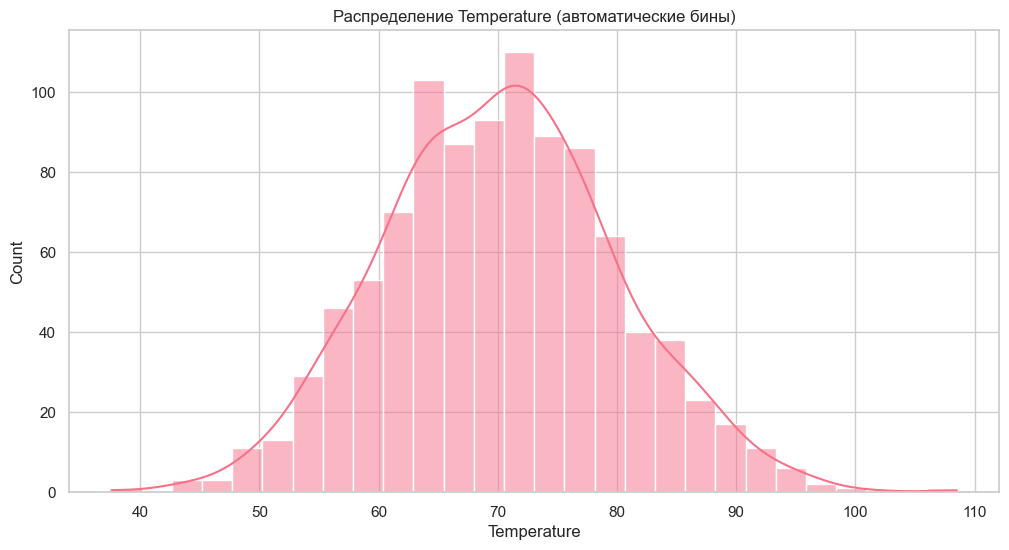

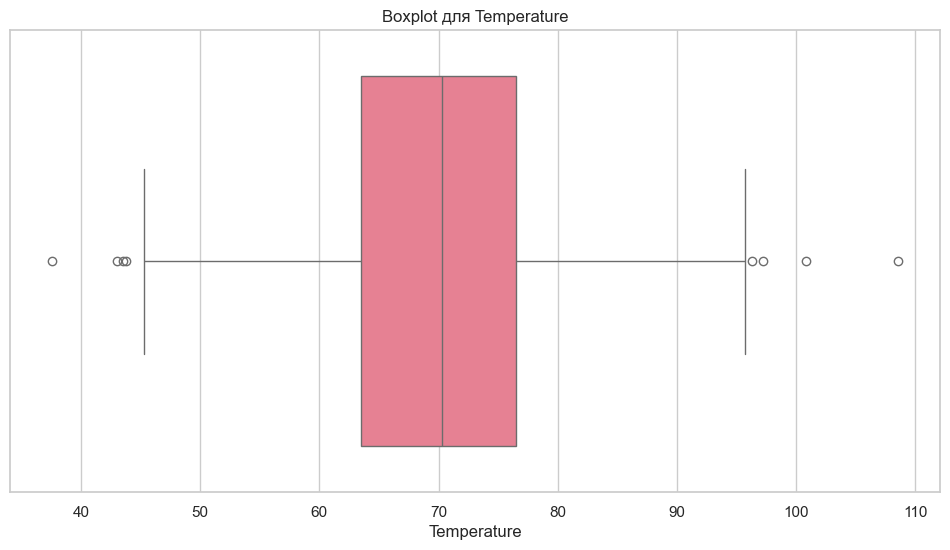

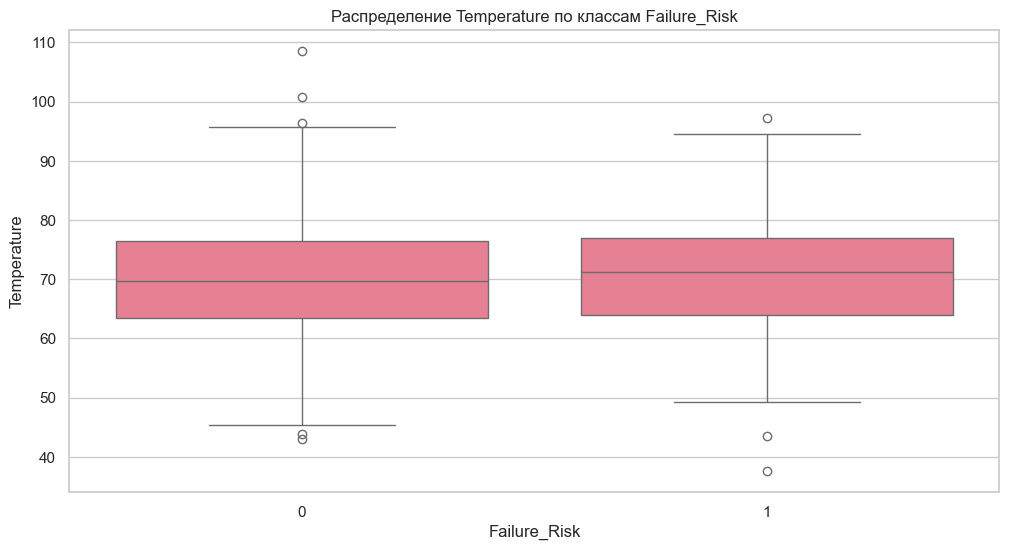


Анализ признака: Vibration
Базовые статистики:
            count  mean  std   min   25%   50%   75%   max  skewness  kurtosis
Vibration 1000.00 50.35 4.99 35.30 46.97 50.32 53.64 65.97     -0.05      0.06

Автоматически определенные бины (23 интервалов):
[35.3  36.63 37.96 39.3  40.63 41.96 43.3  44.63 45.97 47.3  48.63 49.97
 51.3  52.63 53.97 55.3  56.63 57.97 59.3  60.63 61.97 63.3  64.63 65.97]


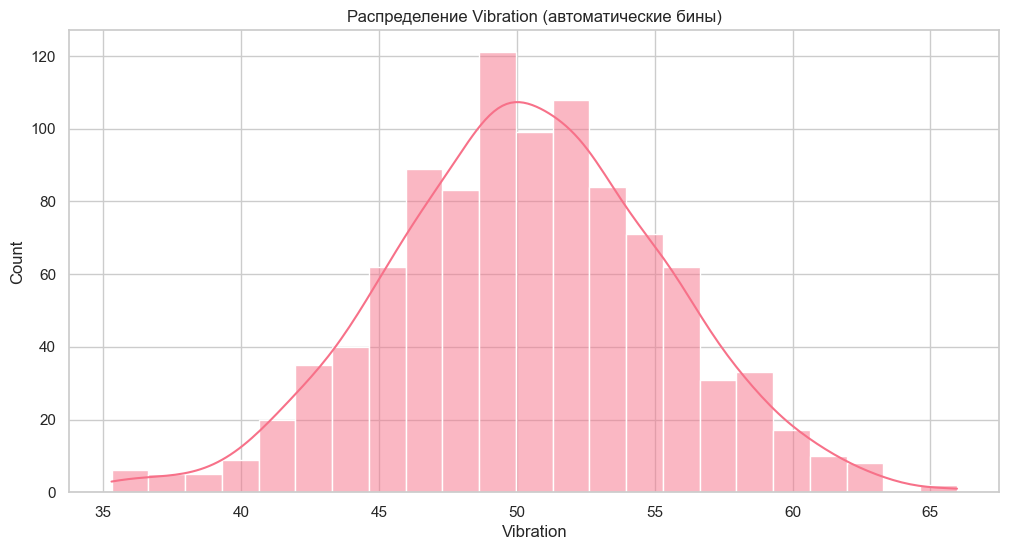

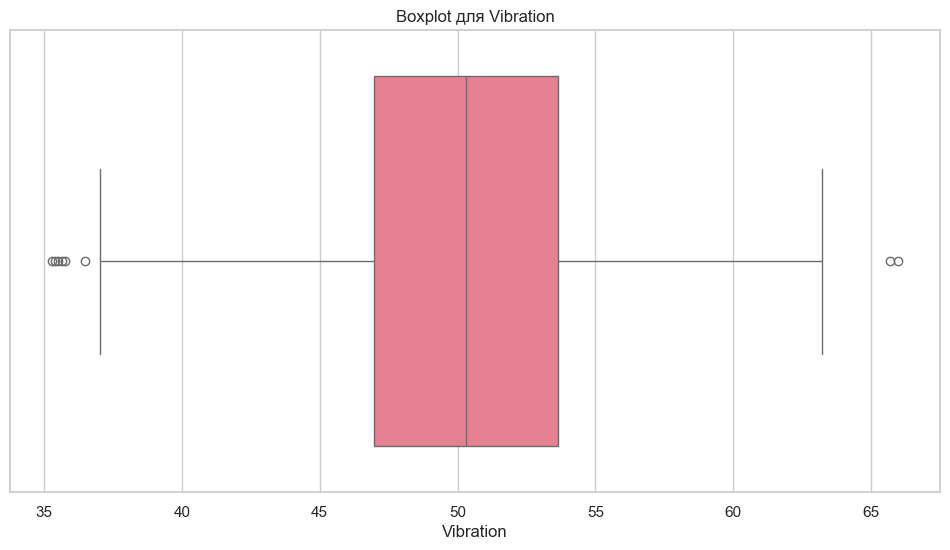

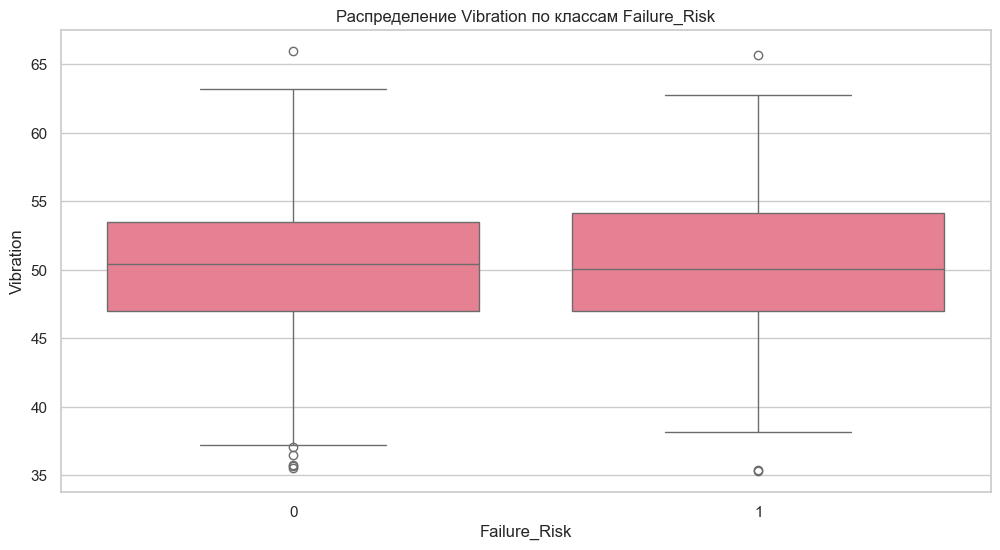


Анализ признака: Power_Usage
Базовые статистики:
              count  mean  std  min  25%   50%   75%   max  skewness  kurtosis
Power_Usage 1000.00 10.01 1.97 3.96 8.70 10.00 11.32 17.85      0.06      0.17

Автоматически определенные бины (27 интервалов):
[ 3.96  4.48  4.99  5.5   6.02  6.53  7.05  7.56  8.08  8.59  9.11  9.62
 10.13 10.65 11.16 11.68 12.19 12.71 13.22 13.74 14.25 14.77 15.28 15.79
 16.31 16.82 17.34 17.85]


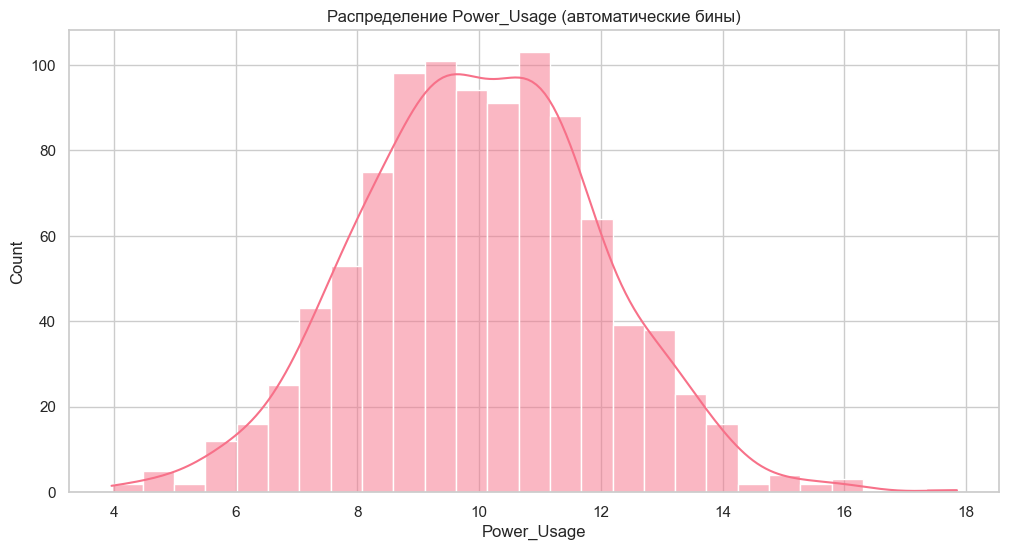

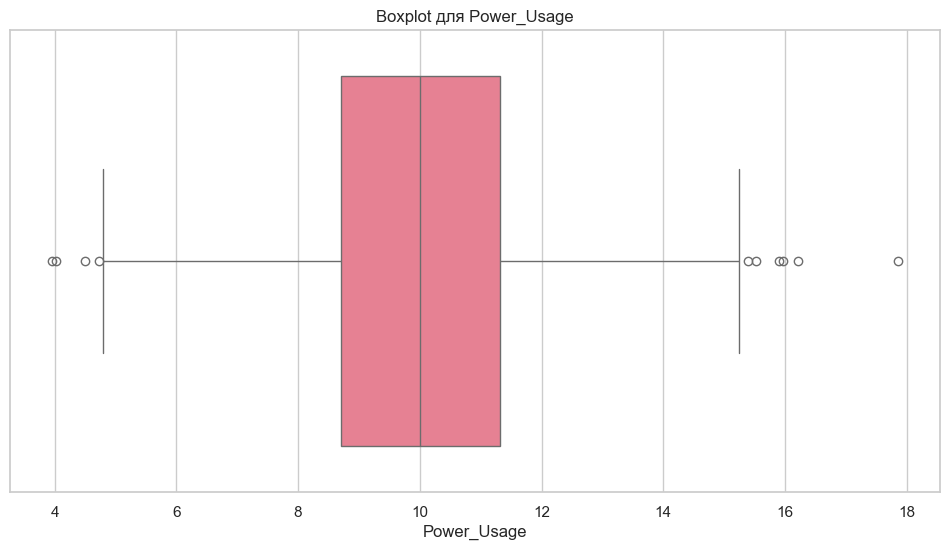

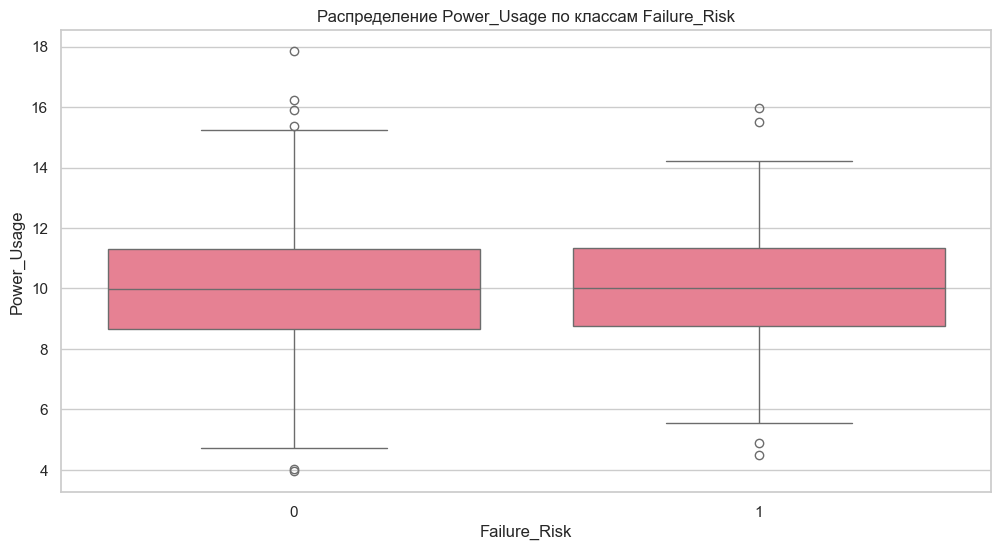


Анализ признака: Humidity
Базовые статистики:
           count  mean  std   min   25%   50%   75%   max  skewness  kurtosis
Humidity 1000.00 29.91 5.14 15.35 26.31 30.00 33.33 46.22     -0.00     -0.23

Автоматически определенные бины (22 интервалов):
[15.35 16.76 18.16 19.56 20.96 22.37 23.77 25.17 26.58 27.98 29.38 30.78
 32.19 33.59 34.99 36.4  37.8  39.2  40.6  42.01 43.41 44.81 46.22]


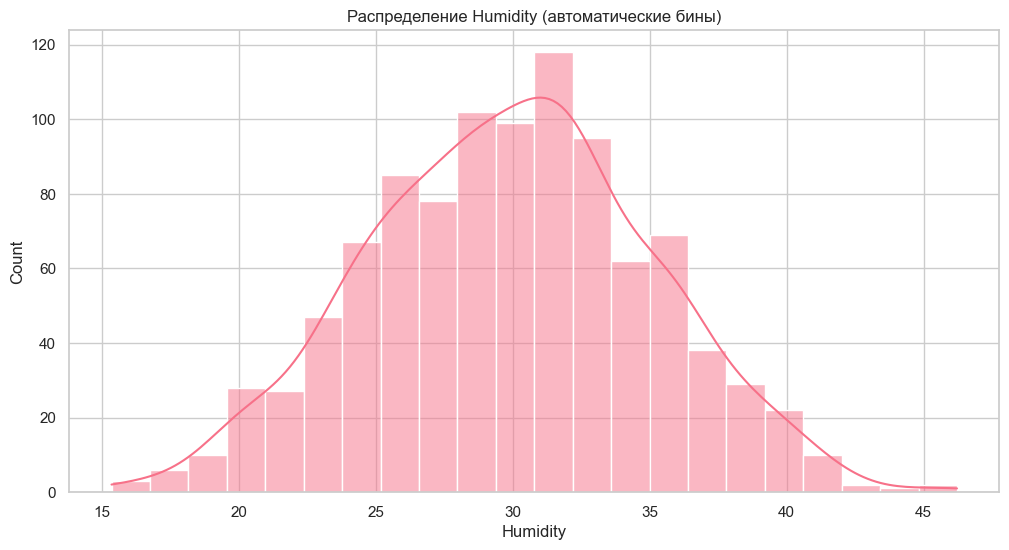

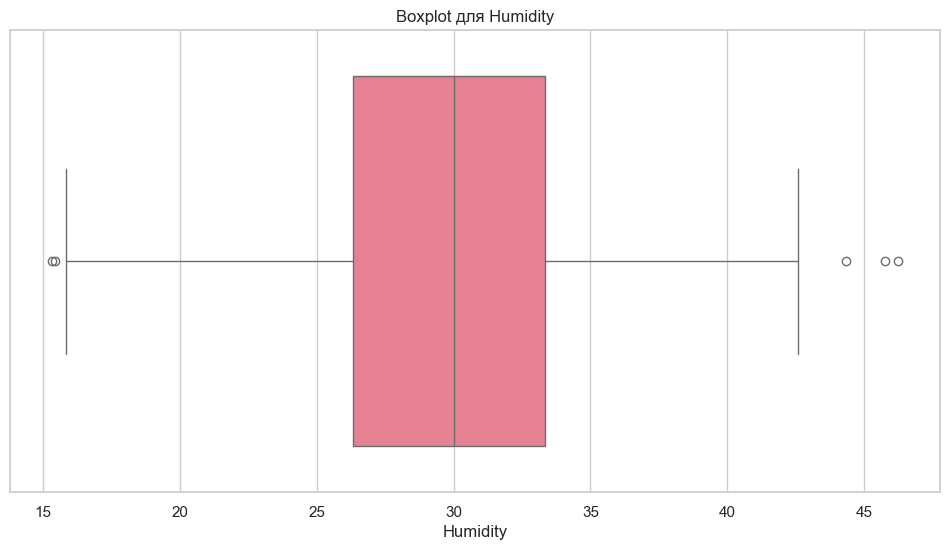

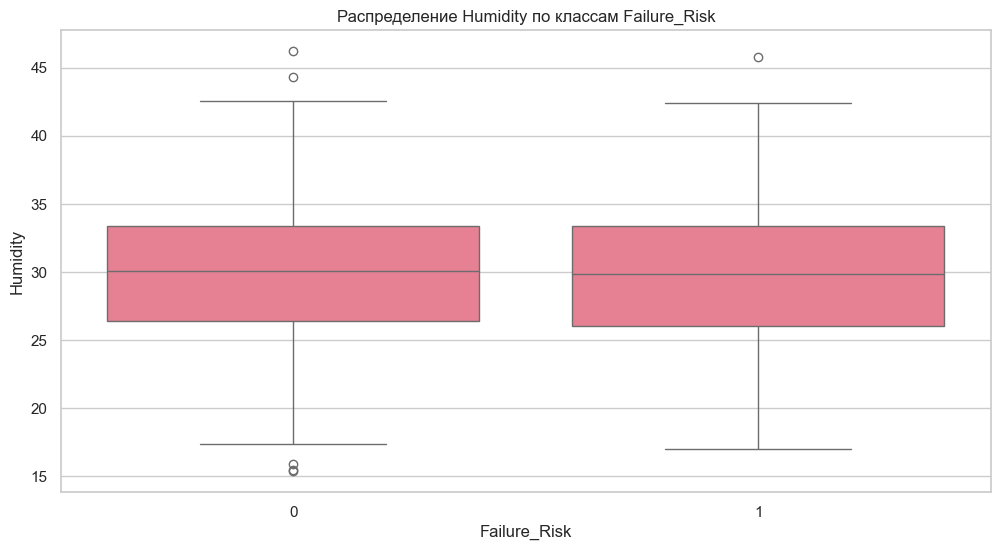


Анализ категориального признака: Machine_Type
Распределение категорий (%):
Machine_Type  Lathe  Drill  Mill
proportion    33.80  33.40 32.80

Частота Failure_Risk по категориям (%):
Failure_Risk     0     1
Machine_Type            
Drill        68.90 31.10
Lathe        68.90 31.10
Mill         72.30 27.70


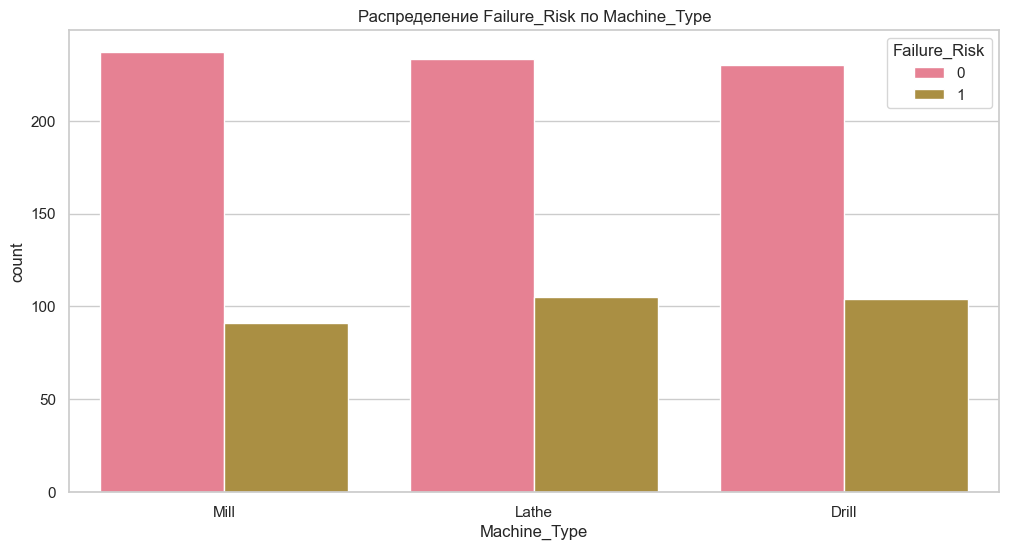


Анализ категориального признака: Failure_Risk
Распределение категорий (%):
Failure_Risk     0     1
proportion   70.00 30.00

Частота Failure_Risk по категориям (%):
Failure_Risk      0      1
Failure_Risk              
0            100.00   0.00
1              0.00 100.00


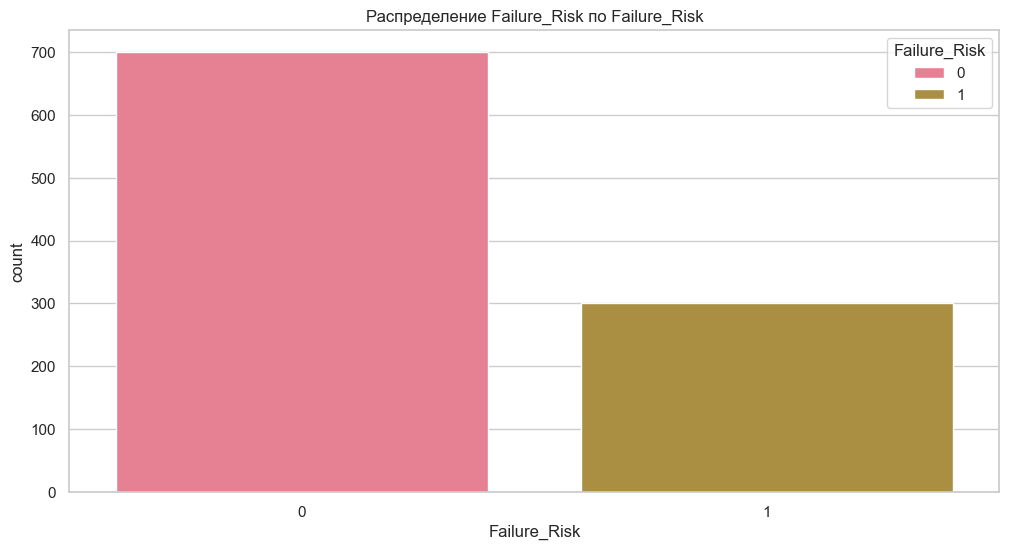


Анализ выбросов
       Признак  Выбросы (Z-оценка >3)  Выбросы (IQR метод)
0  Temperature                      3                    8
1    Vibration                      4                    8
2  Power_Usage                      5                   10
3     Humidity                      2                    5

Isolation Forest обнаружил 134 выбросов


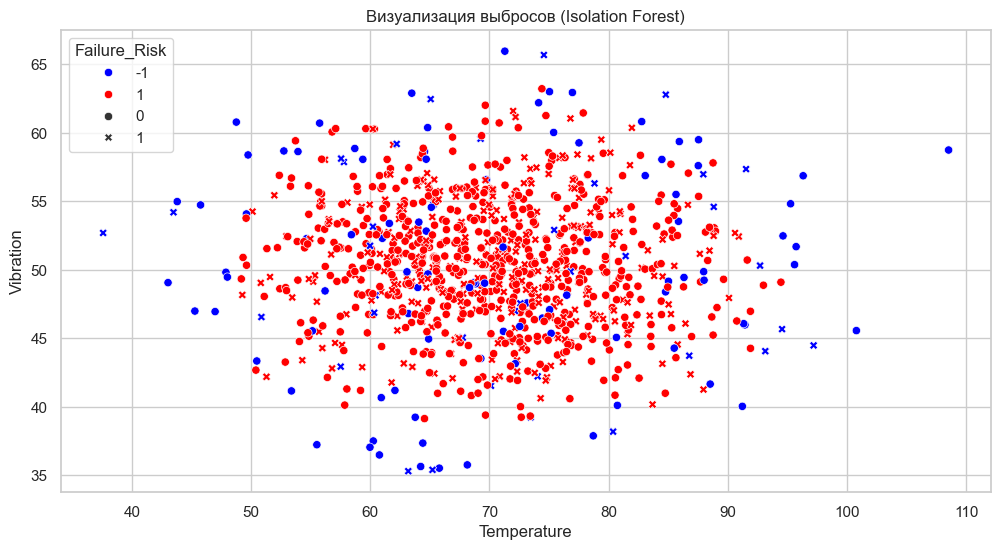


Корреляционный анализ
Матрица корреляций Пирсона:
              Temperature  Vibration  Power_Usage  Humidity  Failure_Risk
Temperature          1.00      -0.04         0.02     -0.01          0.03
Vibration           -0.04       1.00        -0.01     -0.05         -0.00
Power_Usage          0.02      -0.01         1.00      0.02          0.02
Humidity            -0.01      -0.05         0.02      1.00         -0.02
Failure_Risk         0.03      -0.00         0.02     -0.02          1.00


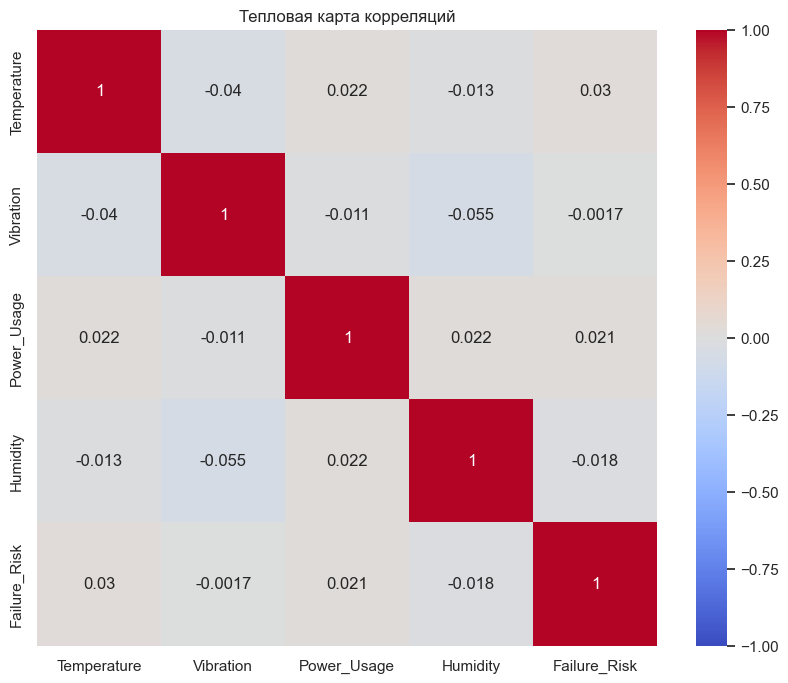

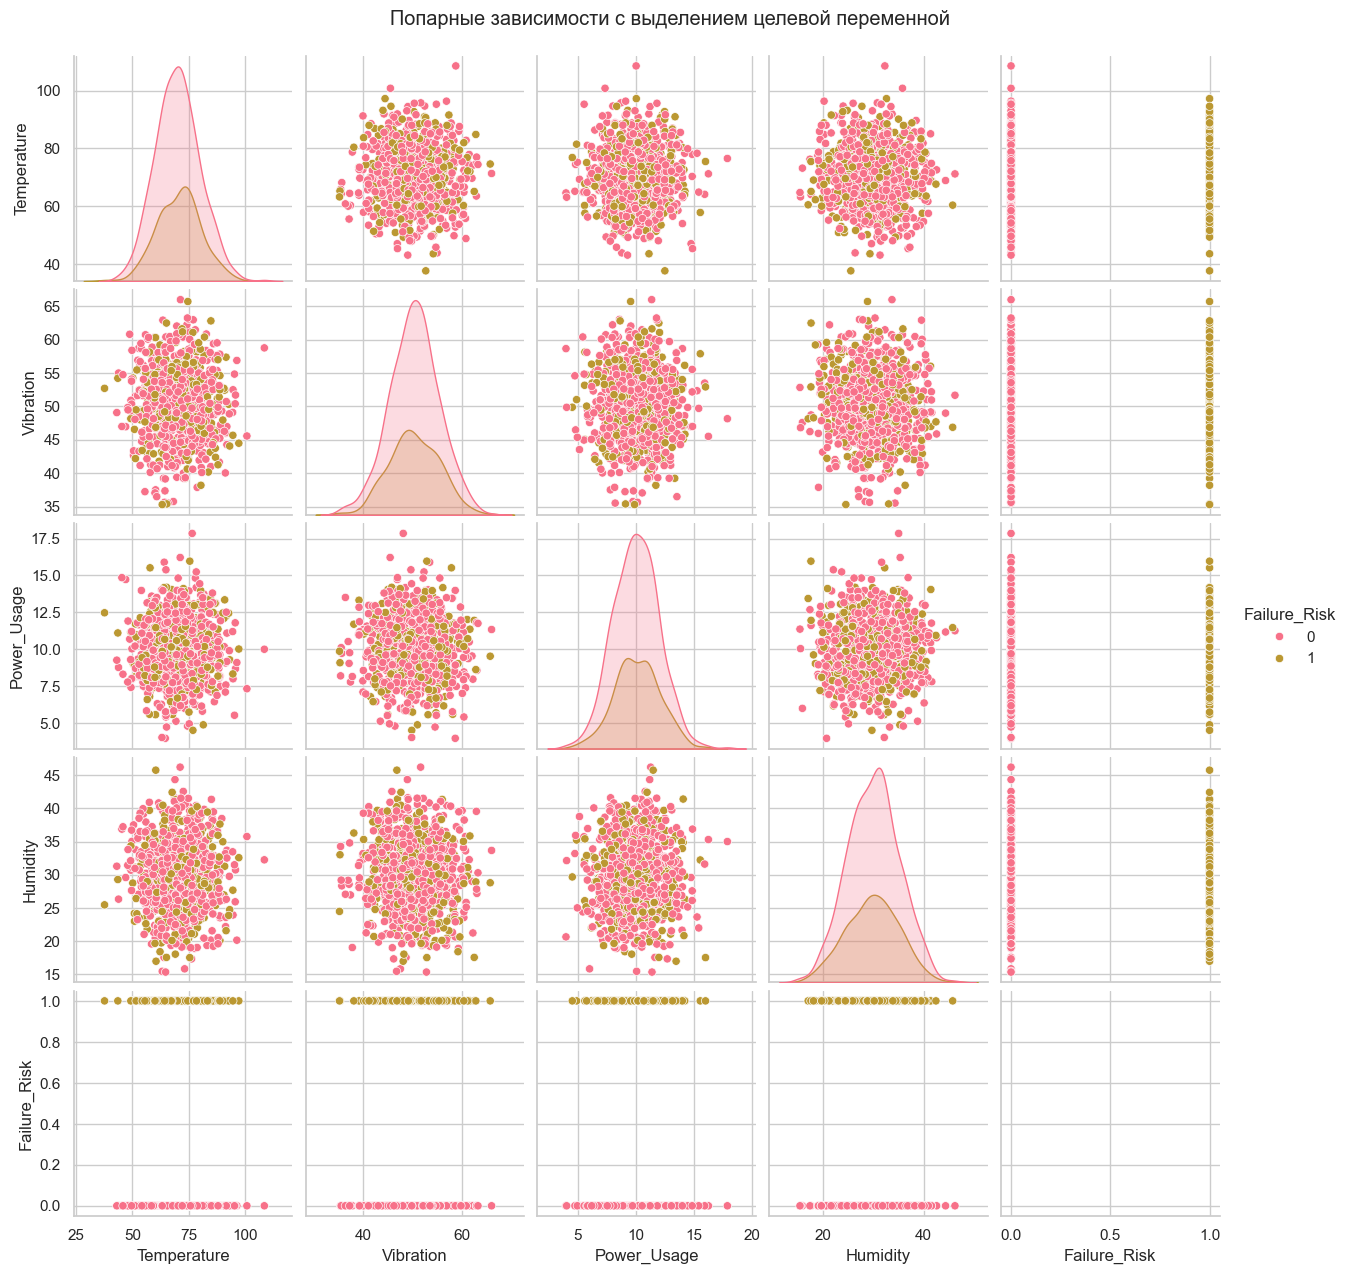


Многомерный анализ
Объясненная дисперсия PCA:
  Компонента  Доля дисперсии  Кумулятивная доля
0        PC1            0.64               0.64
1        PC2            0.18               0.82


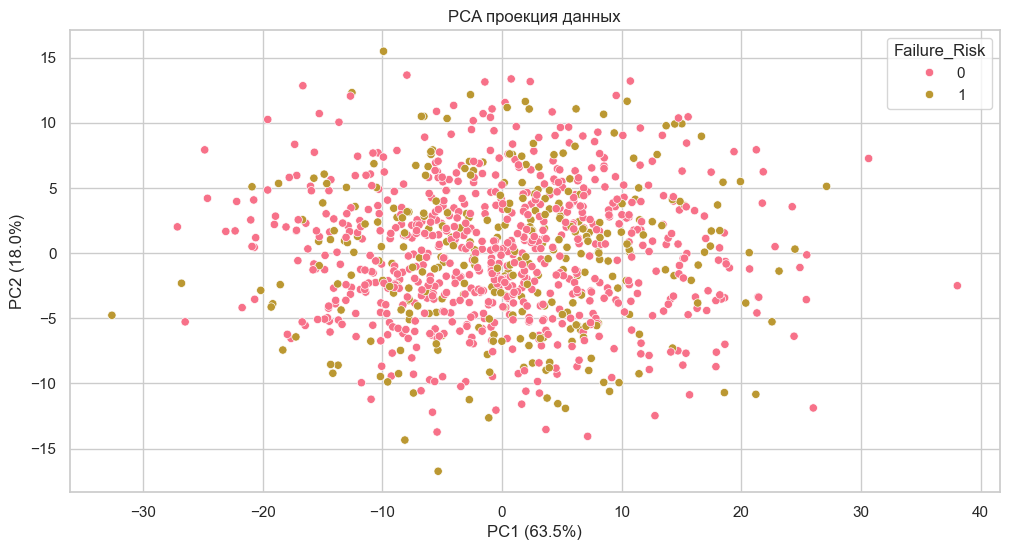

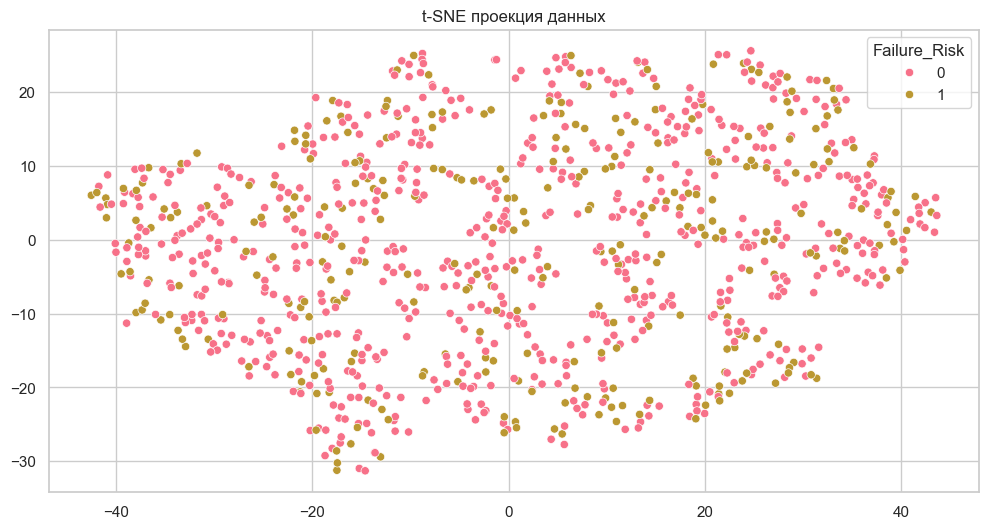

In [53]:
# Настройка отображения
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-colorblind') 
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (12, 6)

### 1. Функции для автоматического анализа
def auto_analyze_feature(df, feature_name, target_name='Failure_Risk'):
    """Автоматический анализ признака"""
    print(f"\n{'='*50}\nАнализ признака: {feature_name}\n{'='*50}")
    
    # Базовые статистики
    stats = df[feature_name].describe()
    stats['skewness'] = df[feature_name].skew()
    stats['kurtosis'] = df[feature_name].kurt()
    print("Базовые статистики:")
    print(stats.to_frame().T)
    
    # Автоматическое определение бинов
    bin_edges = np.histogram_bin_edges(df[feature_name], bins='auto')
    print(f"\nАвтоматически определенные бины ({len(bin_edges)-1} интервалов):")
    print(bin_edges.round(2))
    
    # Гистограмма с KDE
    plt.figure()
    sns.histplot(df[feature_name], bins=bin_edges, kde=True)
    plt.title(f'Распределение {feature_name} (автоматические бины)')
    plt.show()
    
    # Boxplot
    plt.figure()
    sns.boxplot(x=df[feature_name])
    plt.title(f'Boxplot для {feature_name}')
    plt.show()
    
    # Распределение по целевой переменной
    if target_name in df.columns:
        plt.figure()
        sns.boxplot(x=target_name, y=feature_name, data=df)
        plt.title(f'Распределение {feature_name} по классам {target_name}')
        plt.show()

def analyze_categorical(df, feature_name, target_name='Failure_Risk'):
    """Анализ категориального признака"""
    print(f"\n{'='*50}\nАнализ категориального признака: {feature_name}\n{'='*50}")
    
    # Распределение категорий
    dist = df[feature_name].value_counts(normalize=True).mul(100).round(1)
    print("Распределение категорий (%):")
    print(dist.to_frame().T)
    
    # Связь с целевой переменной
    if target_name in df.columns:
        cross_tab = pd.crosstab(df[feature_name], df[target_name], 
                              normalize='index').mul(100).round(1)
        print(f"\nЧастота {target_name} по категориям (%):")
        print(cross_tab)
        
        plt.figure()
        sns.countplot(x=feature_name, hue=target_name, data=df)
        plt.title(f'Распределение {target_name} по {feature_name}')
        plt.show()

### 2. Анализ непрерывных признаков
numeric_features = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']
for feature in numeric_features:
    auto_analyze_feature(data, feature)

### 3. Анализ категориальных признаков
categorical_features = ['Machine_Type']
for feature in categorical_features:
    analyze_categorical(data, feature)

# Анализ целевой переменной
if 'Failure_Risk' in data.columns:
    analyze_categorical(data, 'Failure_Risk')

### 4. Анализ выбросов
def detect_outliers(df, features):
    """Обнаружение выбросов разными методами"""
    print(f"\n{'='*50}\nАнализ выбросов\n{'='*50}")
    
    results = []
    for feature in features:
        # Метод Z-оценки
        z_scores = np.abs(stats.zscore(df[feature]))
        z_outliers = np.sum(z_scores > 3)
        
        # Метод IQR
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        iqr_outliers = ((df[feature] < (q1 - 1.5*iqr)) | (df[feature] > (q3 + 1.5*iqr))).sum()
        
        results.append({
            'Признак': feature,
            'Выбросы (Z-оценка >3)': z_outliers,
            'Выбросы (IQR метод)': iqr_outliers
        })
    
    # Isolation Forest
    iso_forest = IsolationForest(contamination='auto', random_state=42)
    outliers = iso_forest.fit_predict(df[features])
    iso_outliers = np.sum(outliers == -1)
    
    print(pd.DataFrame(results))
    print(f"\nIsolation Forest обнаружил {iso_outliers} выбросов")
    
    # Визуализация выбросов
    if 'Failure_Risk' in df.columns:
        plt.figure()
        sns.scatterplot(x=features[0], y=features[1], 
                       hue=outliers, style=df['Failure_Risk'], 
                       data=df, palette=['blue', 'red'])
        plt.title('Визуализация выбросов (Isolation Forest)')
        plt.show()

detect_outliers(data, numeric_features)

### 5. Корреляционный анализ
def correlation_analysis(df, features):
    """Анализ корреляций"""
    print(f"\n{'='*50}\nКорреляционный анализ\n{'='*50}")
    
    # Матрица корреляций
    corr_matrix = df[features].corr()
    print("Матрица корреляций Пирсона:")
    print(corr_matrix)
    
    # Визуализация
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
               vmin=-1, vmax=1, center=0)
    plt.title('Тепловая карта корреляций')
    plt.show()
    
    # Попарные зависимости
    if 'Failure_Risk' in df.columns:
        sns.pairplot(df, vars=features, hue='Failure_Risk')
        plt.suptitle('Попарные зависимости с выделением целевой переменной', y=1.02)
        plt.show()

correlation_analysis(data, numeric_features + ['Failure_Risk'])

### 6. Многомерный анализ
def multivariate_analysis(df, features):
    """Многомерный анализ"""
    print(f"\n{'='*50}\nМногомерный анализ\n{'='*50}")
    
    # PCA анализ
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df[features])
    
    print("Объясненная дисперсия PCA:")
    print(pd.DataFrame({
        'Компонента': ['PC1', 'PC2'],
        'Доля дисперсии': pca.explained_variance_ratio_,
        'Кумулятивная доля': np.cumsum(pca.explained_variance_ratio_)
    }))
    
    # Визуализация PCA
    plt.figure()
    if 'Failure_Risk' in df.columns:
        sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], 
                       hue=df['Failure_Risk'])
    else:
        sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
    plt.title('PCA проекция данных')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    plt.show()
    
    # t-SNE анализ
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(df[features])
    
    plt.figure()
    if 'Failure_Risk' in df.columns:
        sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], 
                       hue=df['Failure_Risk'])
    else:
        sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])
    plt.title('t-SNE проекция данных')
    plt.show()

multivariate_analysis(data, numeric_features)

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


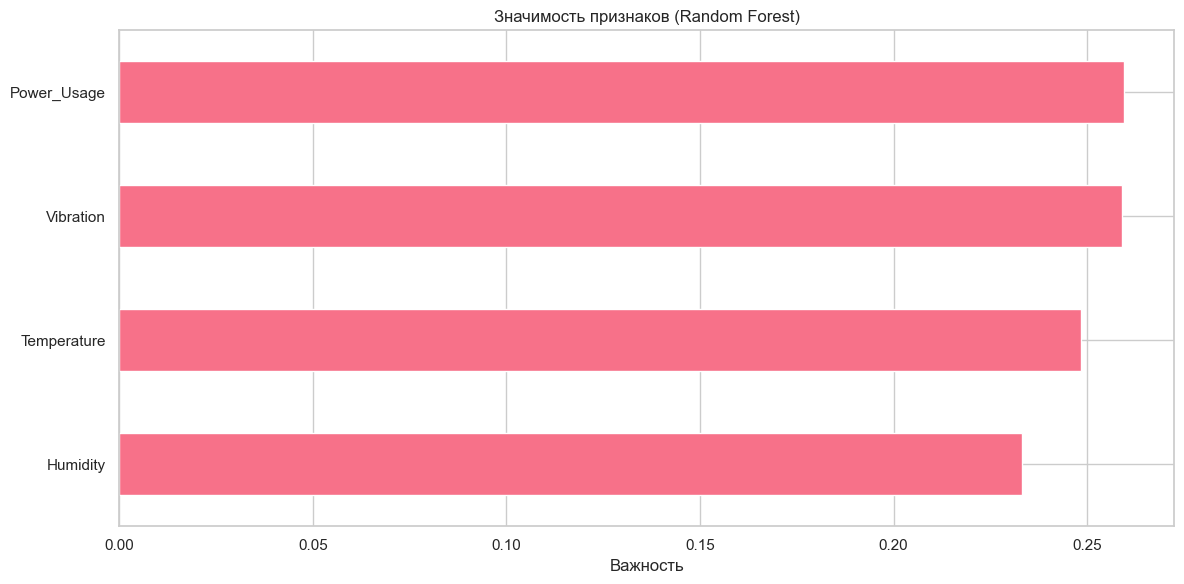

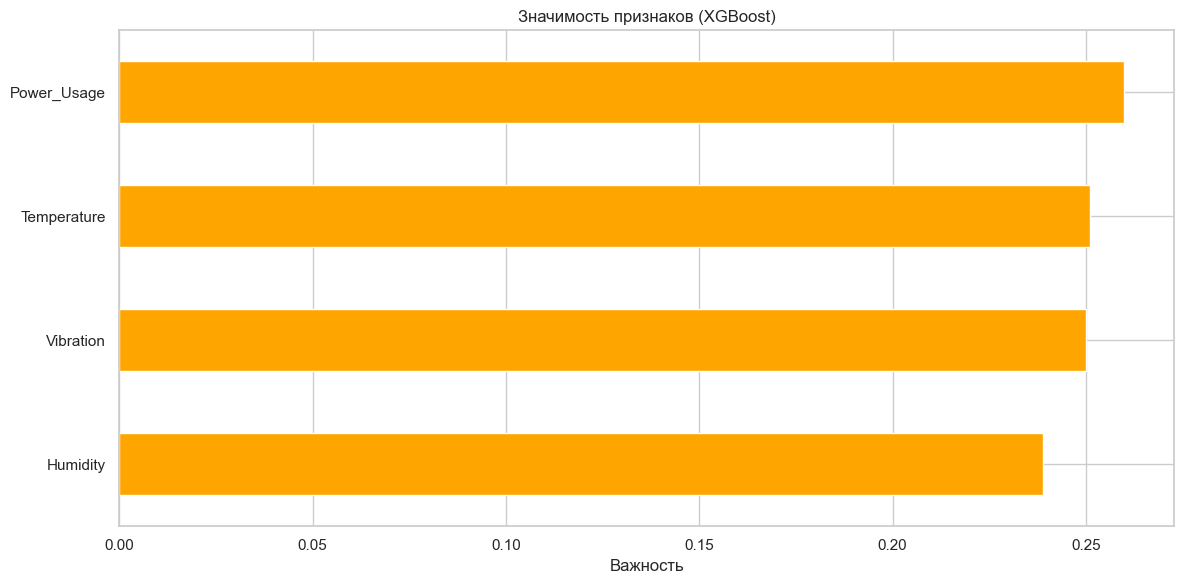

In [54]:
# Feature Importance (Random Forest и XGBoost)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Нормализация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_features])
y = data['Failure_Risk']

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

rf_importances = pd.Series(rf.feature_importances_, index=numeric_features)
rf_importances.sort_values().plot(kind='barh')
plt.title('Значимость признаков (Random Forest)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_scaled, y)

xgb_importances = pd.Series(xgb.feature_importances_, index=numeric_features)
xgb_importances.sort_values().plot(kind='barh', color='orange')
plt.title('Значимость признаков (XGBoost)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()


In [55]:
print(data.shape)
print(numeric_features)

(1000, 6)
['Temperature', 'Vibration', 'Power_Usage', 'Humidity']


In [ ]:
# data = pd.read_csv("machine_failure_dataset.csv")

==== СТАТИСТИЧЕСКИЙ АНАЛИЗ ПРИЗНАКОВ ====
       Temperature  Vibration  Power_Usage  Humidity
count      1000.00    1000.00      1000.00   1000.00
mean         70.19      50.35        10.01     29.91
std           9.79       4.99         1.97      5.14
min          37.59      35.30         3.96     15.35
25%          63.52      46.97         8.70     26.31
50%          70.25      50.32        10.00     30.00
75%          76.48      53.64        11.32     33.33
max         108.53      65.97        17.85     46.22


==== КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (ОТКАЗ ОБОРУДОВАНИЯ) ====
Temperature    0.03
Power_Usage    0.02
Vibration     -0.00
Humidity      -0.02
Name: Failure_Risk, dtype: float64


==== ЗНАЧИМОСТЬ ПРИЗНАКОВ (RANDOM FOREST) ====
Power_Usage   0.26
Vibration     0.26
Temperature   0.25
Humidity      0.23
dtype: float64


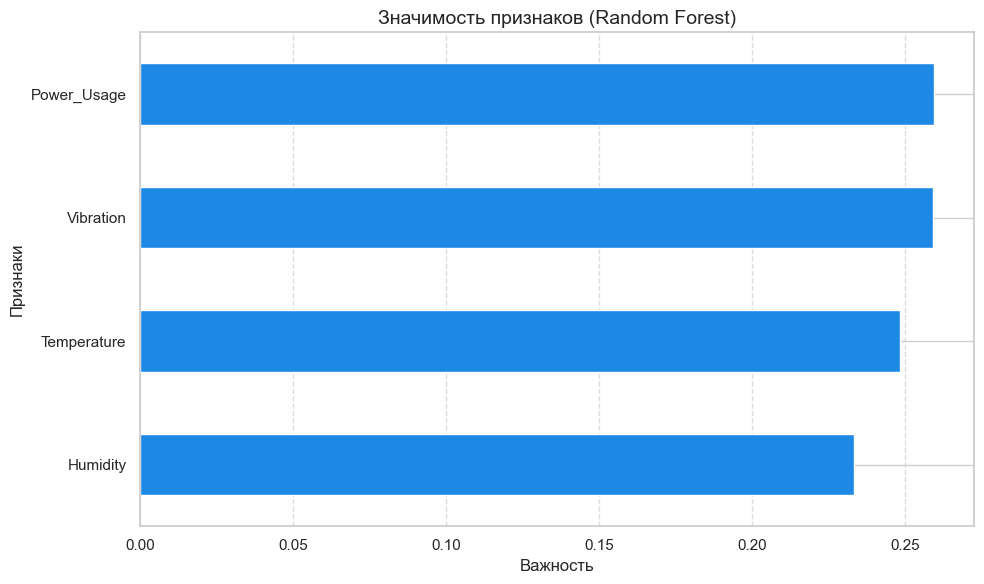


==== ЗНАЧИМОСТЬ ПРИЗНАКОВ (XGBOOST) ====
Power_Usage   0.26
Temperature   0.25
Vibration     0.25
Humidity      0.24
dtype: float32


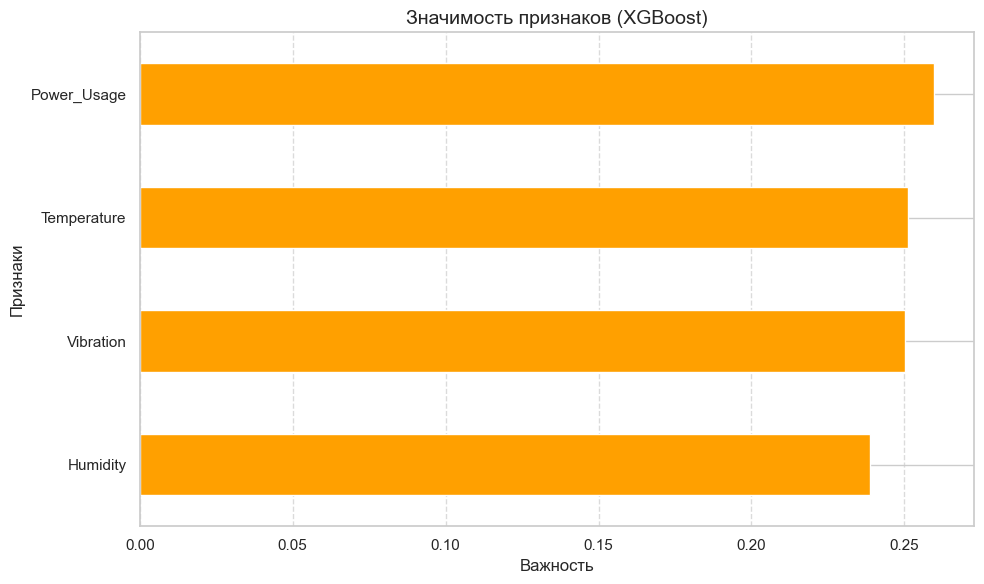


==== СРАВНЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ В МОДЕЛЯХ ====
             Random Forest  XGBoost
Power_Usage           0.26     0.26
Vibration             0.26     0.25
Temperature           0.25     0.25
Humidity              0.23     0.24


<Figure size 1200x800 with 0 Axes>

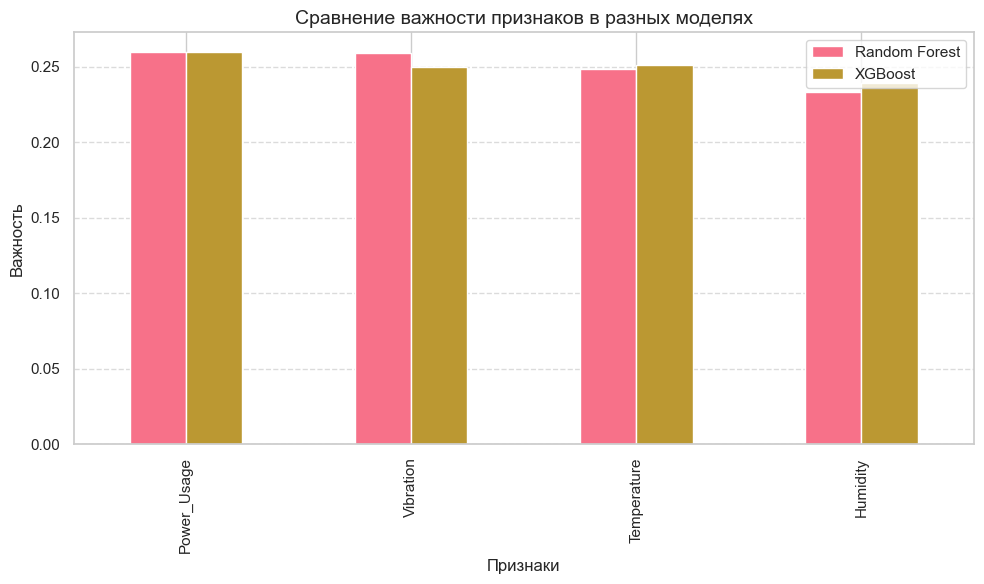


==== АНАЛИЗ ОТКАЗОВ ПО ТИПАМ МАШИН ====
Частота отказов по типам машин (от 0 до 1):
Machine_Type
Drill   0.31
Lathe   0.31
Mill    0.28
Name: Failure_Risk, dtype: float64


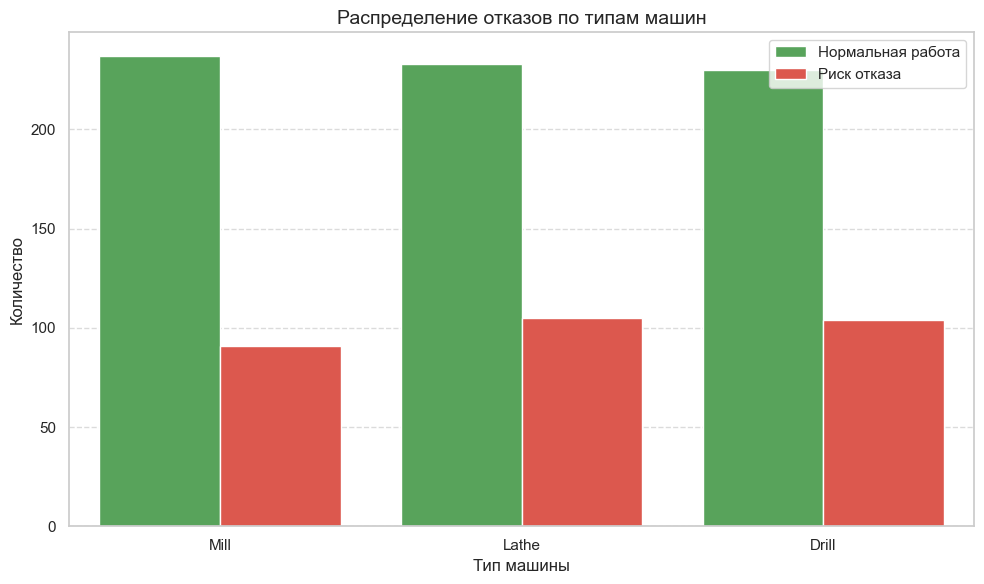

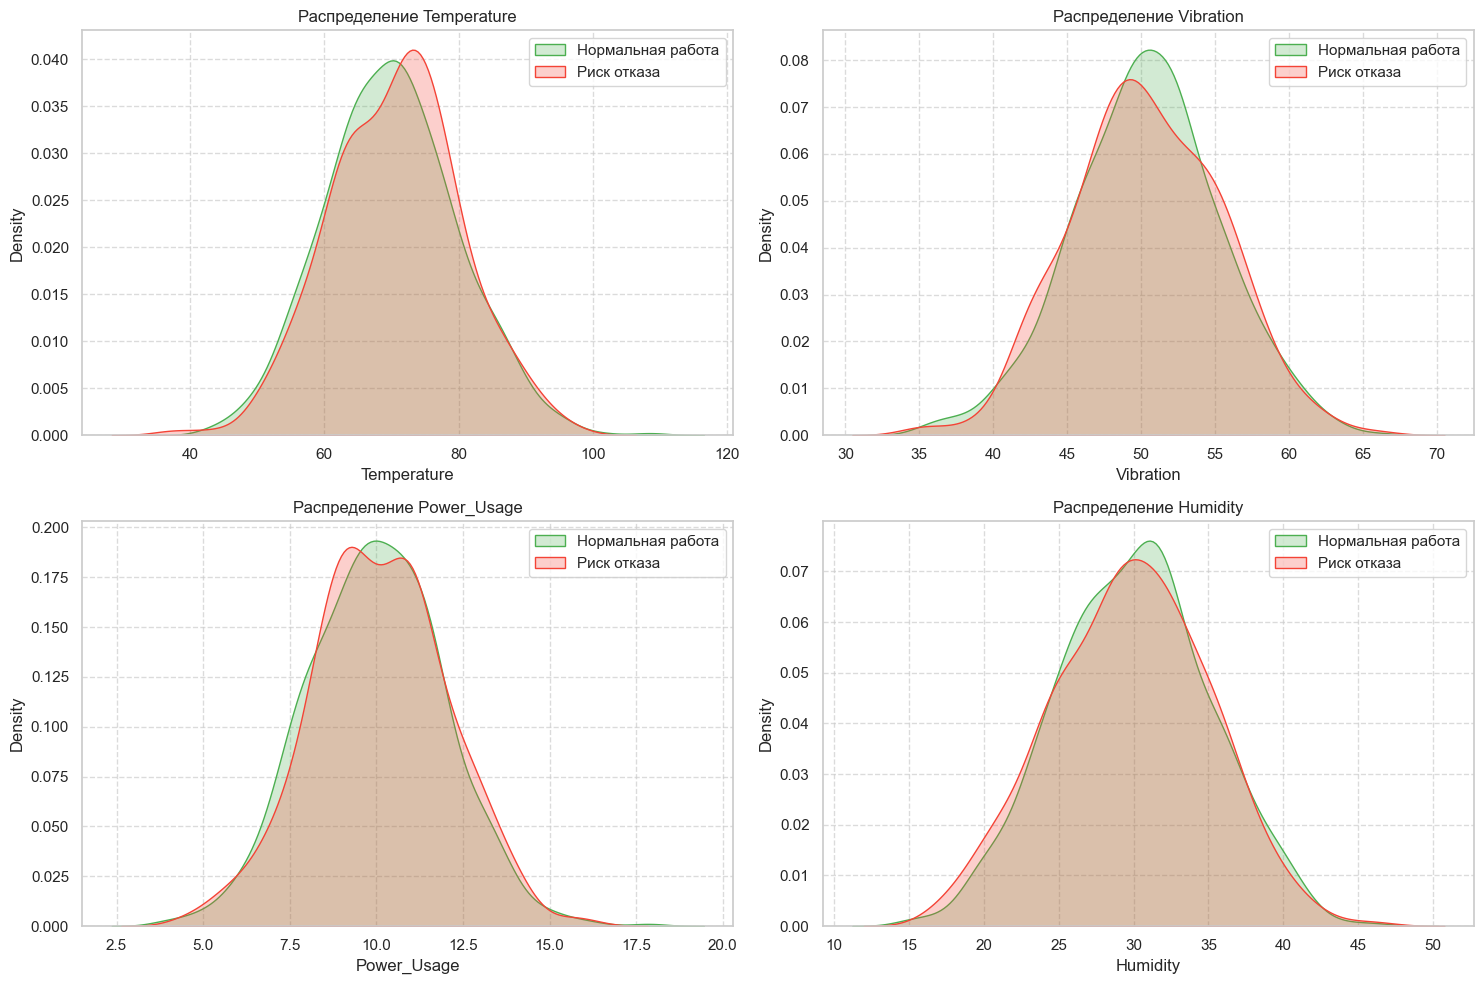


==== ПОРОГОВЫЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ДЛЯ ОТКАЗОВ ====
Temperature:
  Норма: 70.00 ± 9.86
  Отказ: 70.64 ± 9.62
  Рекомендуемый порог: 70.32

Vibration:
  Норма: 50.36 ± 4.97
  Отказ: 50.34 ± 5.03
  Рекомендуемый порог: 50.35

Power_Usage:
  Норма: 9.98 ± 1.98
  Отказ: 10.07 ± 1.95
  Рекомендуемый порог: 10.03

Humidity:
  Норма: 29.97 ± 5.10
  Отказ: 29.77 ± 5.21
  Рекомендуемый порог: 29.87



In [56]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("machine_failure_dataset.csv")
numeric_features = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']

# Подготовка данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_features])
y = data['Failure_Risk']

# 1. Статистический анализ - вывод основных характеристик
print("==== СТАТИСТИЧЕСКИЙ АНАЛИЗ ПРИЗНАКОВ ====")
stats = data[numeric_features].describe().round(2)
print(stats)
print("\n")

# 2. Корреляция с целевой переменной
print("==== КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (ОТКАЗ ОБОРУДОВАНИЯ) ====")
correlations = data[numeric_features + ['Failure_Risk']].corr()['Failure_Risk'].drop('Failure_Risk')
print(correlations.sort_values(ascending=False))
print("\n")

# 3. Random Forest - важность признаков
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_scaled, y)
rf_importances = pd.Series(rf.feature_importances_, index=numeric_features)

print("==== ЗНАЧИМОСТЬ ПРИЗНАКОВ (RANDOM FOREST) ====")
print(rf_importances.sort_values(ascending=False))

# Визуализация Random Forest
plt.figure(figsize=(10, 6))
rf_importances.sort_values().plot(kind='barh', color='#1E88E5')
plt.title('Значимость признаков (Random Forest)', fontsize=14)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300)
plt.show()

# 4. XGBoost - важность признаков
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_scaled, y)
xgb_importances = pd.Series(xgb.feature_importances_, index=numeric_features)

print("\n==== ЗНАЧИМОСТЬ ПРИЗНАКОВ (XGBOOST) ====")
print(xgb_importances.sort_values(ascending=False))

# Визуализация XGBoost
plt.figure(figsize=(10, 6))
xgb_importances.sort_values().plot(kind='barh', color='#FFA000')
plt.title('Значимость признаков (XGBoost)', fontsize=14)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('xgb_feature_importance.png', dpi=300)
plt.show()

# 5. Сравнение важности признаков в моделях
plt.figure(figsize=(12, 8))

# Создание DataFrame для сравнения
comparison = pd.DataFrame({
    'Random Forest': rf_importances,
    'XGBoost': xgb_importances
})

# Сортировка по среднему значению важности
# comparison = comparison.sort_values(by=['Random Forest', 'XGBoost'].mean(axis=1), ascending=False)
comparison['Mean_Importance'] = comparison.mean(axis=1)
comparison = comparison.sort_values(by='Mean_Importance', ascending=False)
comparison = comparison.drop('Mean_Importance', axis=1)  # Убираем вспомогательный столбец после сортировки

# Вывод сравнительной таблицы
print("\n==== СРАВНЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ В МОДЕЛЯХ ====")
print(comparison)

# Визуализация сравнения
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение важности признаков в разных моделях', fontsize=14)
plt.xlabel('Признаки', fontsize=12)
plt.ylabel('Важность', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300)
plt.show()

# 6. Расширенный анализ по типам машин
print("\n==== АНАЛИЗ ОТКАЗОВ ПО ТИПАМ МАШИН ====")

# Подсчет частоты отказов по типам машин
failure_by_type = data.groupby('Machine_Type')['Failure_Risk'].mean().sort_values(ascending=False)
print(f"Частота отказов по типам машин (от 0 до 1):\n{failure_by_type}")

# Визуализация отказов по типам машин
plt.figure(figsize=(10, 6))
sns.countplot(x='Machine_Type', hue='Failure_Risk', data=data, palette=['#4CAF50', '#F44336'])
plt.title('Распределение отказов по типам машин', fontsize=14)
plt.xlabel('Тип машины', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend(['Нормальная работа', 'Риск отказа'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('failures_by_machine_type.png', dpi=300)
plt.show()

# 7. Распределение значений признаков для нормальной работы и отказов
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=data[data['Failure_Risk']==0][feature], label='Нормальная работа', shade=True, color='#4CAF50')
    sns.kdeplot(data=data[data['Failure_Risk']==1][feature], label='Риск отказа', shade=True, color='#F44336')
    plt.title(f'Распределение {feature}')
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300)
plt.show()

# 8. Определение пороговых значений для признаков
print("\n==== ПОРОГОВЫЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ДЛЯ ОТКАЗОВ ====")
for feature in numeric_features:
    normal_mean = data[data['Failure_Risk']==0][feature].mean()
    failure_mean = data[data['Failure_Risk']==1][feature].mean()
    normal_std = data[data['Failure_Risk']==0][feature].std()
    failure_std = data[data['Failure_Risk']==1][feature].std()
    
    print(f"{feature}:")
    print(f"  Норма: {normal_mean:.2f} ± {normal_std:.2f}")
    print(f"  Отказ: {failure_mean:.2f} ± {failure_std:.2f}")
    
    # Расчет порогового значения (простой метод - среднее между средними)
    threshold = (normal_mean + failure_mean) / 2
    print(f"  Рекомендуемый порог: {threshold:.2f}")
    print()


Многомерный анализ

Объясненная дисперсия PCA:
PC1: 26.84%
PC2: 25.35%


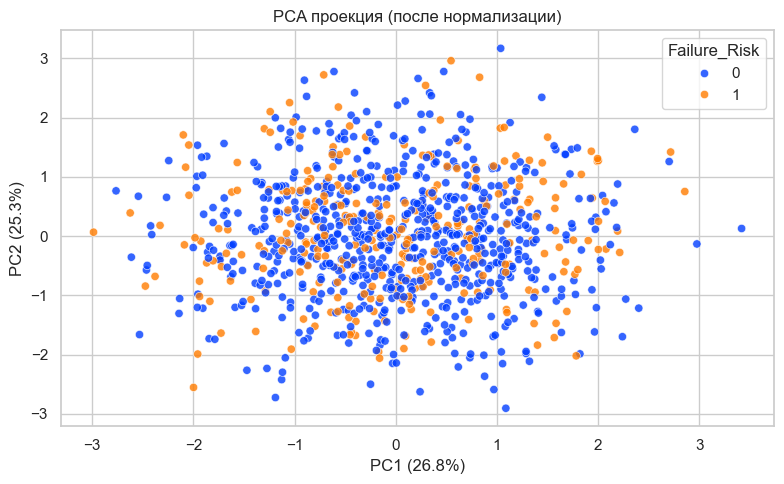

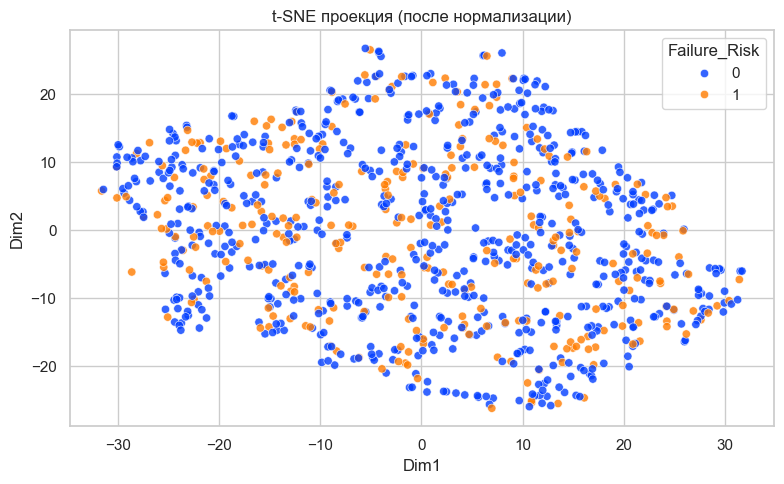

In [57]:
# Нормализация данных перед PCA и t-SNE

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def multivariate_analysis(df, features):
    print(f"\n{'='*50}\nМногомерный анализ\n{'='*50}")

    # Проверка на наличие целевой переменной
    if 'Failure_Risk' not in df.columns:
        print("Нет колонки 'Failure_Risk' в данных!")
        return

    # Масштабирование
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    y = df['Failure_Risk'].values

    # --- PCA ---
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)

    df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
    df_pca['Failure_Risk'] = y

    print("\nОбъясненная дисперсия PCA:")
    for i, val in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {val:.2%}")

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Failure_Risk", palette="bright", alpha=0.8)
    plt.title("PCA проекция (после нормализации)")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.tight_layout()
    plt.show()

    # --- t-SNE ---
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
    tsne_result = tsne.fit_transform(X_scaled)

    df_tsne = pd.DataFrame(tsne_result, columns=["Dim1", "Dim2"])
    df_tsne['Failure_Risk'] = y

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="Failure_Risk", palette="bright", alpha=0.8)
    # sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="Failure_Risk", palette={0: "steelblue", 1: "crimson"}, alpha=0.8)

    plt.title("t-SNE проекция (после нормализации)")
    plt.tight_layout()
    plt.show()
# Вызов функции
multivariate_analysis(data, numeric_features)


Всего выбросов (Isolation Forest): 134
Из них с Failure_Risk = 1: 37 (27.6%)


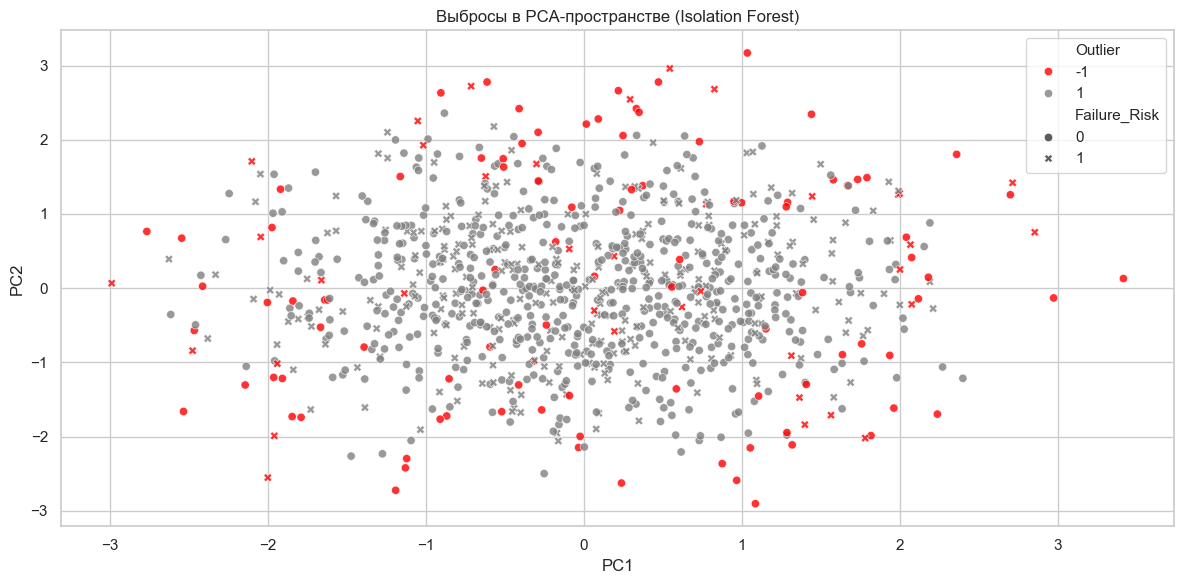

In [58]:
# Улучшенная визуализация выбросов (на основе PCA-компонент)

def improved_outlier_visualization(df, features):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    outliers = IsolationForest(contamination='auto', random_state=42).fit_predict(X_scaled)

    pca_result = PCA(n_components=2).fit_transform(X_scaled)
    df_vis = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
    df_vis['Outlier'] = outliers
    df_vis['Failure_Risk'] = df['Failure_Risk'].values

    # Расчёт статистики
    total_outliers = (df_vis['Outlier'] == -1).sum()
    risky_outliers = df_vis[(df_vis['Outlier'] == -1) & (df_vis['Failure_Risk'] == 1)].shape[0]
    risky_ratio = risky_outliers / total_outliers * 100 if total_outliers > 0 else 0

    print(f"Всего выбросов (Isolation Forest): {total_outliers}")
    print(f"Из них с Failure_Risk = 1: {risky_outliers} ({risky_ratio:.1f}%)")

    # Визуализация
    sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='Outlier', style='Failure_Risk',
                    palette={1: 'grey', -1: 'red'}, markers={0: 'o', 1: 'X'}, alpha=0.8)
    plt.title('Выбросы в PCA-пространстве (Isolation Forest)')
    plt.tight_layout()
    plt.show()

# Вызов функции
improved_outlier_visualization(data, numeric_features)

In [59]:
# Предобработка данных с расчетом скользящих средних

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Загружаем датасет
data = pd.read_csv('machine_failure_dataset.csv')

# Определение пайплайна предобработки
def preprocess_data(data, rolling_window=5, pca_components=None):
    # 1. Проверка пропущенных значений
    if data.isnull().sum().sum() > 0:
        print("Есть пропущенные значения! Нужно обработать.")
    else:
        print("Пропущенных значений нет.")

    # 2. Кодирование категориальных признаков
    if 'Machine_Type' in data.columns:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        machine_type_encoded = encoder.fit_transform(data[['Machine_Type']])
        machine_type_df = pd.DataFrame(machine_type_encoded, columns=encoder.get_feature_names_out(['Machine_Type']))
        data = pd.concat([data.drop(columns=['Machine_Type']), machine_type_df], axis=1)
    
    # 3. Стандартизация числовых признаков
    numeric_features = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    # 4. Инженерия признаков: добавляем скользящее среднее
    for col in numeric_features:
        data[f'{col}_rolling_mean'] = data[col].rolling(window=rolling_window, min_periods=1).mean()

    # 5. Понижение размерности (опционально)
    if pca_components:
        pca = PCA(n_components=pca_components)
        pca_features = pca.fit_transform(data[numeric_features])
        for i in range(pca_components):
            data[f'PCA_{i+1}'] = pca_features[:, i]
    
    # 6. Разделение на признаки и целевую переменную
    X = data.drop(columns=['Failure_Risk'])
    y = data['Failure_Risk']

    # 7. Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 8. Балансировка классов методом SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    print(f"Размер обучающей выборки после SMOTE: {X_resampled.shape}")

    return X_resampled, X_test, y_resampled, y_test

# Применение пайплайна
X_train_final, X_test_final, y_train_final, y_test_final = preprocess_data(data, rolling_window=5, pca_components=2)


Пропущенных значений нет.
Размер обучающей выборки после SMOTE: (1120, 12)


In [60]:
# Создание производных признаков

window_size = 5
for col in ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']:
    data[f'{col}_rolling_mean'] = data[col].rolling(window=window_size, min_periods=1).mean()

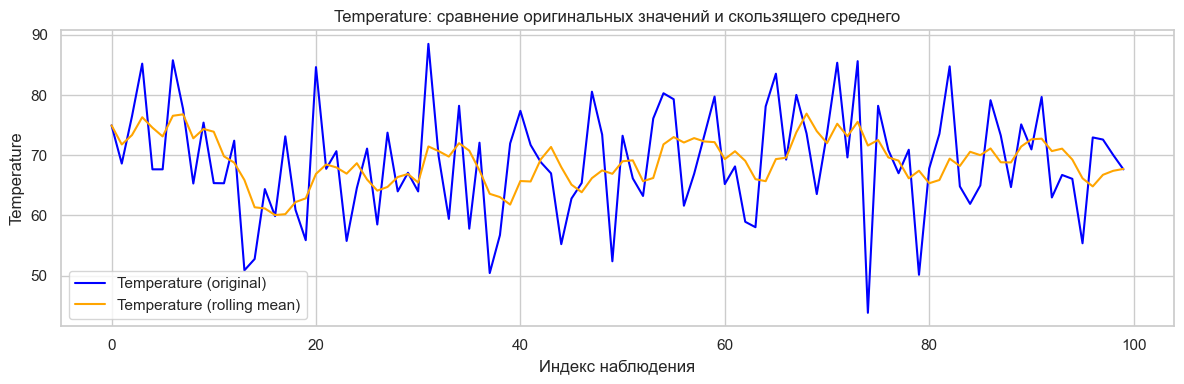

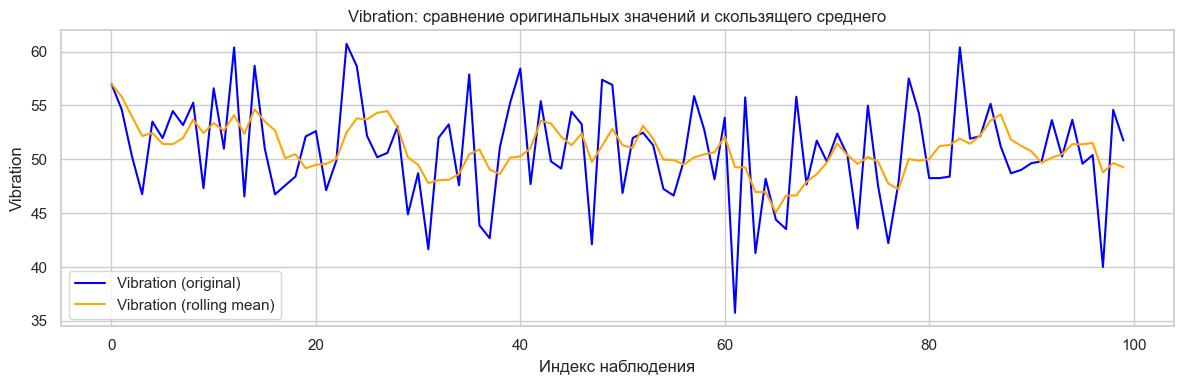

In [61]:
# сравнение исходных значений параметров Temperature и Vibration с соответствующими значениями скользящего среднего по окну шириной 5 наблюдений

import matplotlib.pyplot as plt

# Выбор признаков для визуализации
features_to_plot = ['Temperature', 'Vibration']

# Количество примеров для наглядности (чтобы не перегружать график)
n_samples = 100

for feature in features_to_plot:
    plt.figure(figsize=(12, 4))
    
    # Исходное значение
    plt.plot(data[feature].iloc[:n_samples], label=f'{feature} (original)', color='blue')
    
    # Скользящее среднее
    plt.plot(data[f'{feature}_rolling_mean'].iloc[:n_samples], label=f'{feature} (rolling mean)', color='orange')
    
    plt.title(f'{feature}: сравнение оригинальных значений и скользящего среднего')
    plt.xlabel('Индекс наблюдения')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [62]:
# Понижение размерности

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[numeric_features])
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]
print("Объяснённая дисперсия по компонентам:")
for i, val in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {val:.2%}")


Объяснённая дисперсия по компонентам:
PC1: 63.54%
PC2: 18.02%


Подготовка данных для машинного обучения

Размеры данных после SMOTE: (1120, 10)
Распределение классов после SMOTE:
Failure_Risk
1   0.50
0   0.50
Name: proportion, dtype: float64

ОЦЕНКА КАЧЕСТВА МОДЕЛИ
Precision: 0.281
Recall: 0.150
F1-Score: 0.196
ROC-AUC: 0.506
Average Precision: 0.316

Classification Report:
              precision    recall  f1-score   support

      Normal       0.70      0.84      0.76       140
     At Risk       0.28      0.15      0.20        60

    accuracy                           0.63       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.57      0.63      0.59       200



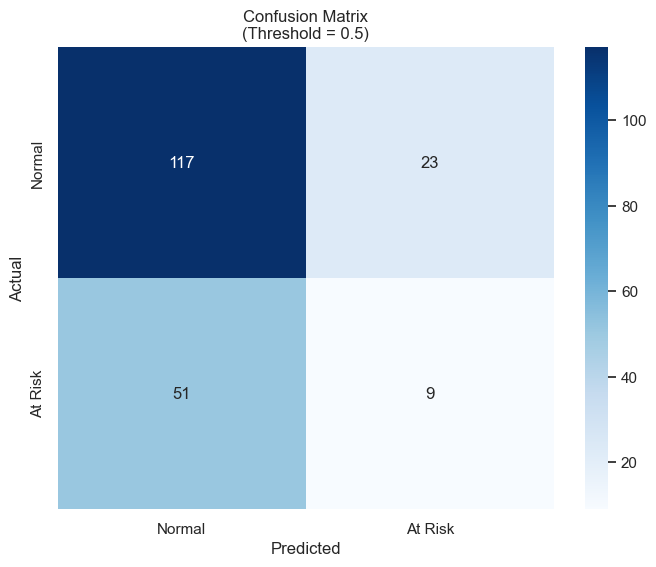

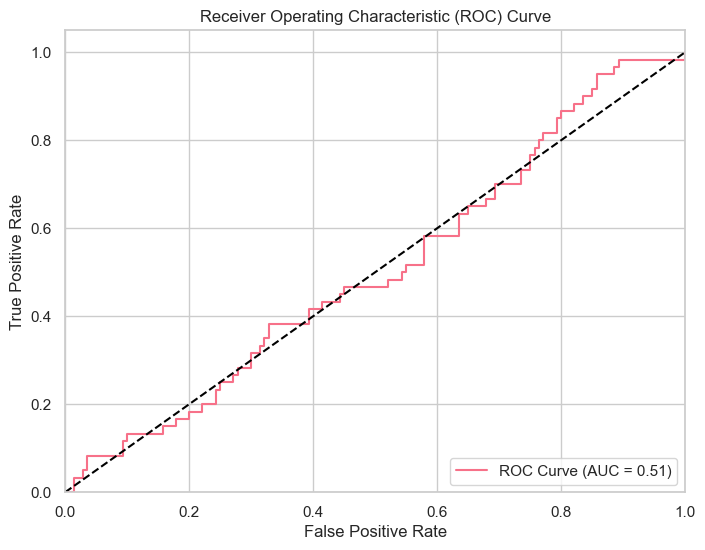

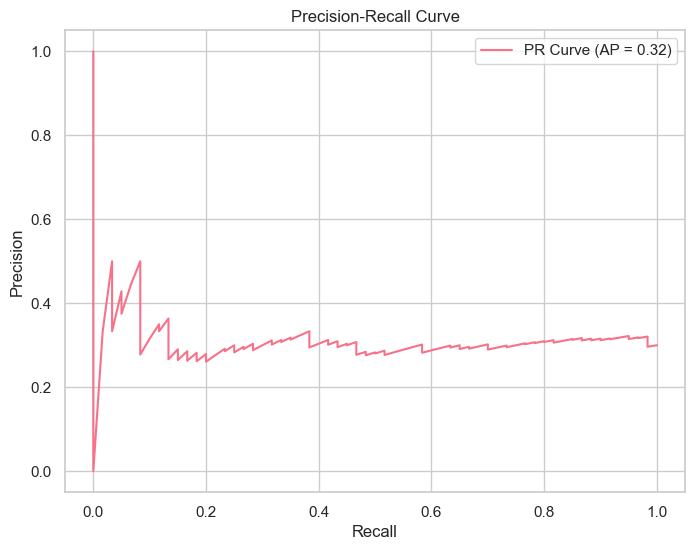

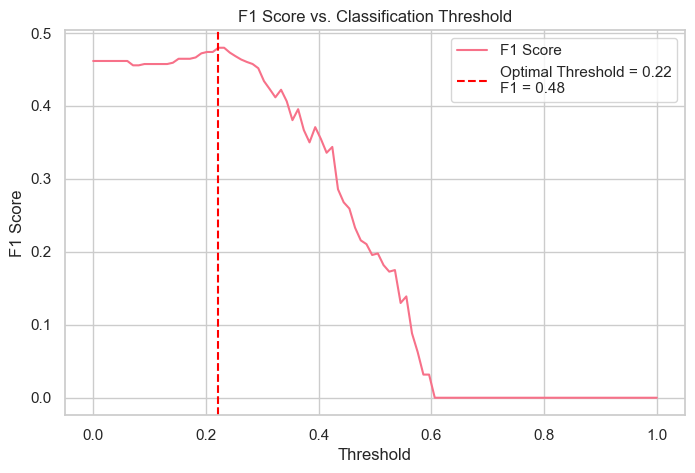


Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

      Normal       0.93      0.09      0.17       140
     At Risk       0.32      0.98      0.48        60

    accuracy                           0.36       200
   macro avg       0.62      0.54      0.32       200
weighted avg       0.75      0.36      0.26       200



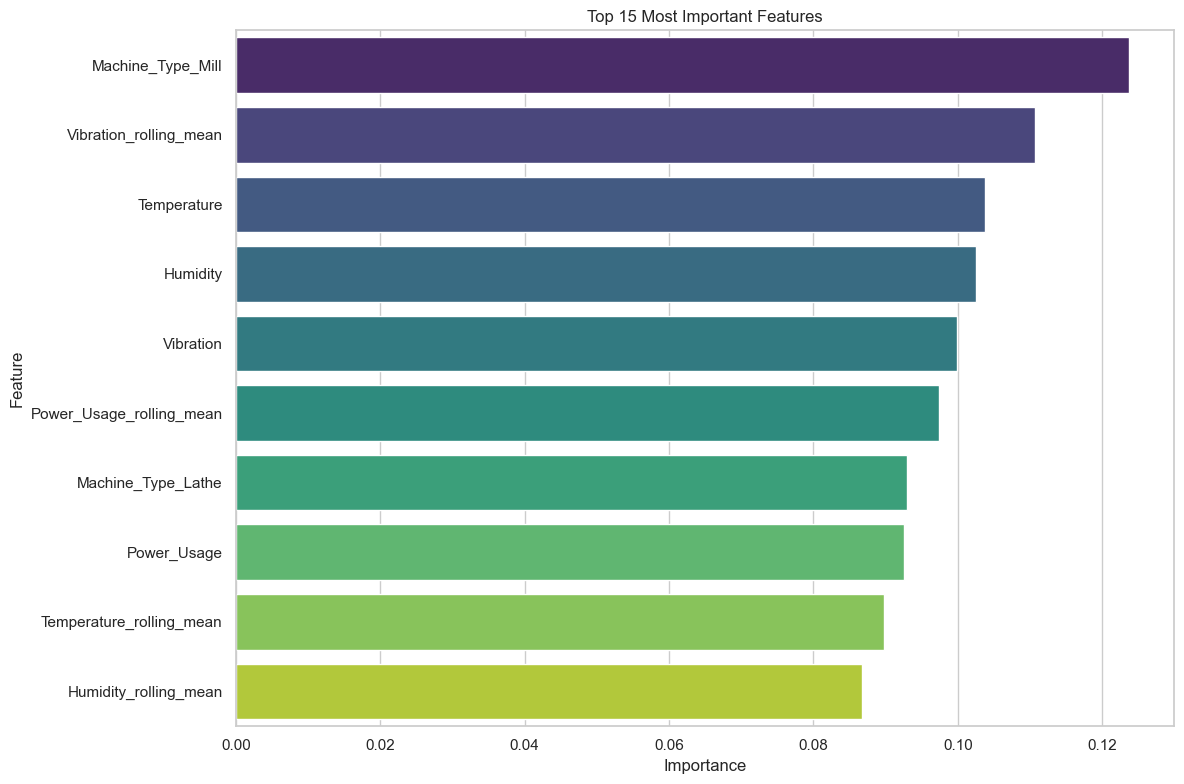

In [63]:
# Улучшенный код для оценки модели

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report,
                            roc_curve, precision_recall_curve, average_precision_score)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import joblib

# 1. Улучшенная функция предобработки данных
def preprocess_data(data, rolling_window=5, pca_components=2):
    """
    Полная предобработка данных с созданием новых признаков
    Возвращает:
    - X_train, X_test, y_train, y_test
    - preprocessing_pipeline (для применения к новым данным)
    """
    # Копируем данные, чтобы не изменять оригинал
    data = data.copy()
    
    # 1. Кодирование категориального признака
    if 'Machine_Type' in data.columns:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        machine_type_encoded = encoder.fit_transform(data[['Machine_Type']])
        machine_type_df = pd.DataFrame(machine_type_encoded, 
                                     columns=encoder.get_feature_names_out(['Machine_Type']))
        data = pd.concat([data.drop(columns=['Machine_Type']), machine_type_df], axis=1)

    # 2. Создание новых признаков
    numeric_features = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']
    
    # Скользящее среднее
    for col in numeric_features:
        data[f'{col}_rolling_mean'] = data[col].rolling(window=rolling_window, min_periods=1).mean()
    
    # 3. Разделение на признаки и целевую переменную
    X = data.drop(columns=['Failure_Risk'])
    y = data['Failure_Risk']
    
    # 4. Разделение на train/test до любых преобразований
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # 5. Создание пайплайна предобработки
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=pca_components))
    ])
    
    preprocessing_pipeline = Pipeline(steps=[
        ('numeric', numeric_transformer)
    ])
    
    # 6. Применение SMOTE только к обучающим данным
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    print(f"Размеры данных после SMOTE: {X_resampled.shape}")
    print("Распределение классов после SMOTE:")
    print(pd.Series(y_resampled).value_counts(normalize=True))
    
    return X_resampled, X_test, y_resampled, y_test, preprocessing_pipeline

# 2. Комплексная функция оценки модели
def evaluate_model(model, X_test, y_test, threshold=0.5):
    """
    Полная оценка модели с визуализацией результатов
    """
    # Получение предсказаний
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Основные метрики
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    
    # Вывод метрик
    print("\n" + "="*50)
    print("ОЦЕНКА КАЧЕСТВА МОДЕЛИ")
    print("="*50)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print(f"Average Precision: {avg_precision:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'At Risk']))
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'At Risk'],
                yticklabels=['Normal', 'At Risk'])
    plt.title('Confusion Matrix\n(Threshold = 0.5)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # ROC-кривая
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision-Recall кривая
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall_curve, precision_curve, label=f'PR Curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()
    
    # Поиск оптимального порога по F1
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_test, y_proba >= t) for t in thresholds]
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    optimal_f1 = f1_scores[optimal_idx]
    
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, f1_scores, label='F1 Score')
    plt.axvline(optimal_threshold, color='r', linestyle='--', 
                label=f'Optimal Threshold = {optimal_threshold:.2f}\nF1 = {optimal_f1:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Classification Threshold')
    plt.legend()
    plt.show()
    
    # Оценка с оптимальным порогом
    y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
    print("\nClassification Report with Optimal Threshold:")
    print(classification_report(y_test, y_pred_optimal, target_names=['Normal', 'At Risk']))
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'optimal_threshold': optimal_threshold
    }

# 3. Анализ важности признаков
def analyze_feature_importance(model, feature_names):
    """
    Анализ и визуализация важности признаков
    """
    # Получение важности признаков
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        print("Модель не поддерживает анализ важности признаков")
        return None
    
    # Создание DataFrame с важностью признаков
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Визуализация топ-15 признаков
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', 
                data=feature_importance.head(15), 
                palette='viridis')
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    return feature_importance

# 4. Полный пайплайн обучения и оценки
def train_and_evaluate(X_train, X_test, y_train, y_test):
    """
    Полный процесс обучения и оценки модели
    """
    # Создание и обучение модели
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42
    )
    
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Сохранение модели
    joblib.dump(model, 'best_model.pkl')
    
    # Оценка модели
    metrics = evaluate_model(model, X_test, y_test)
    
    # Анализ важности признаков
    feature_importance = analyze_feature_importance(model, X_train.columns)
    
    return model, metrics, feature_importance

# Загрузка данных
data = pd.read_csv('machine_failure_dataset.csv')

# Предобработка данных
X_train, X_test, y_train, y_test, preprocessing_pipeline = preprocess_data(data)

# Обучение и оценка модели
model, metrics, feature_importance = train_and_evaluate(X_train, X_test, y_train, y_test)


Evaluating XGBoost

ОЦЕНКА КАЧЕСТВА МОДЕЛИ
Precision: 0.370
Recall: 0.333
F1-Score: 0.351
ROC-AUC: 0.547
Average Precision: 0.343

Classification Report:
              precision    recall  f1-score   support

      Normal       0.73      0.76      0.74       140
     At Risk       0.37      0.33      0.35        60

    accuracy                           0.63       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.62      0.63      0.62       200



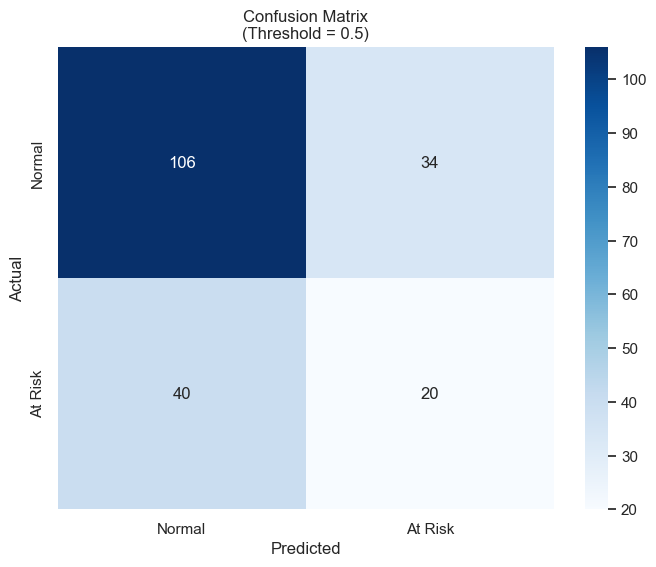

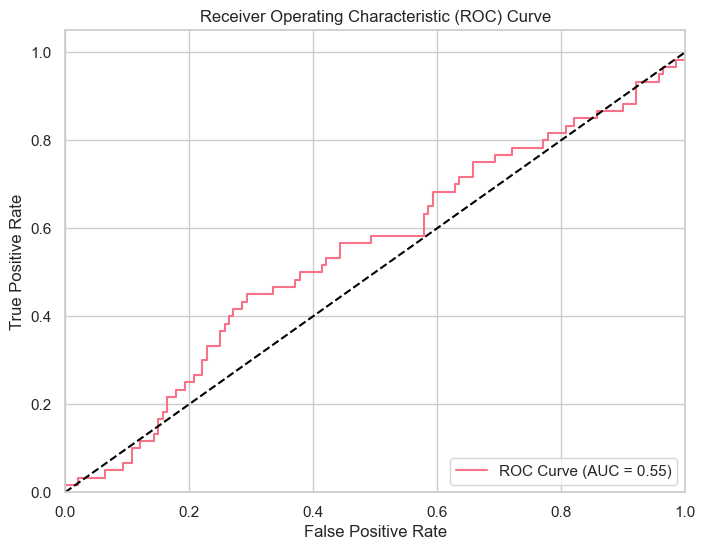

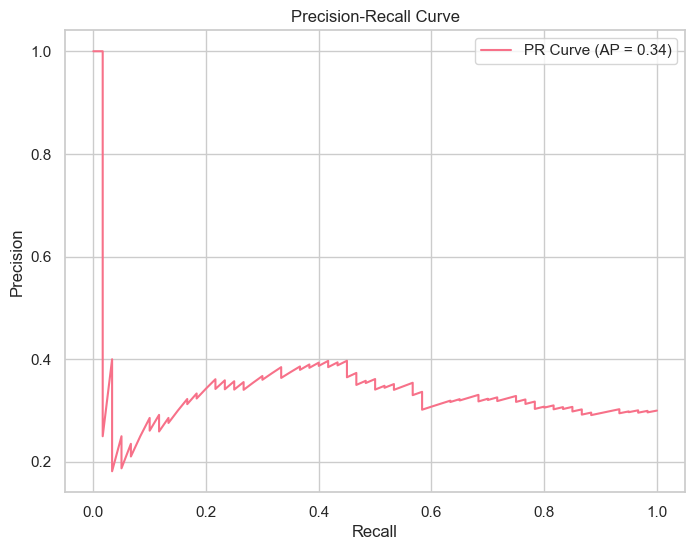

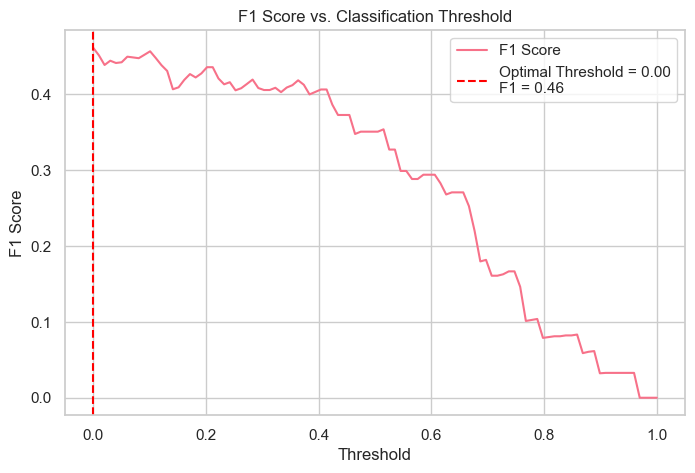


Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       140
     At Risk       0.30      1.00      0.46        60

    accuracy                           0.30       200
   macro avg       0.15      0.50      0.23       200
weighted avg       0.09      0.30      0.14       200


Evaluating SVM

ОЦЕНКА КАЧЕСТВА МОДЕЛИ
Precision: 0.336
Recall: 0.800
F1-Score: 0.473
ROC-AUC: 0.404
Average Precision: 0.256

Classification Report:
              precision    recall  f1-score   support

      Normal       0.79      0.32      0.46       140
     At Risk       0.34      0.80      0.47        60

    accuracy                           0.47       200
   macro avg       0.56      0.56      0.46       200
weighted avg       0.65      0.47      0.46       200



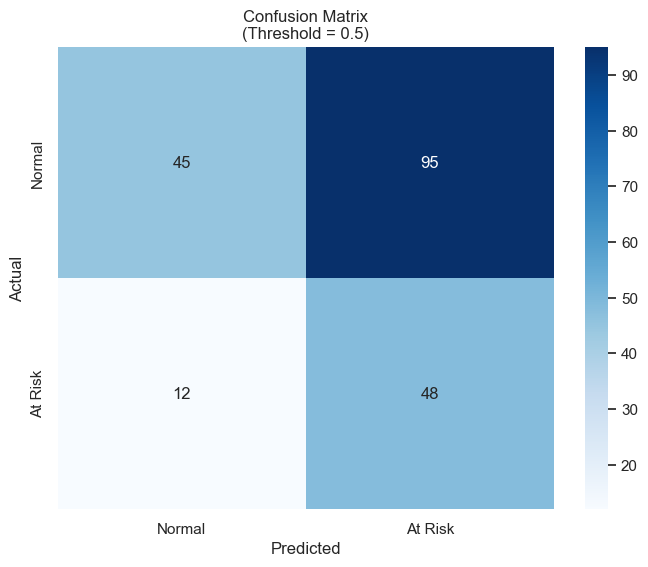

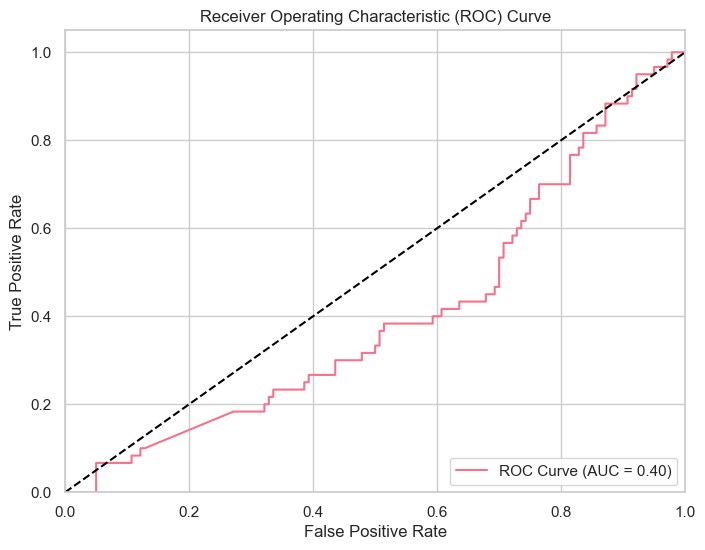

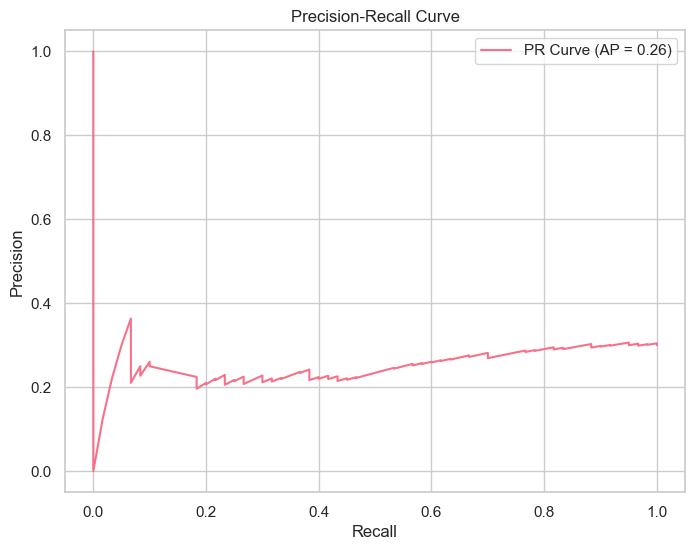

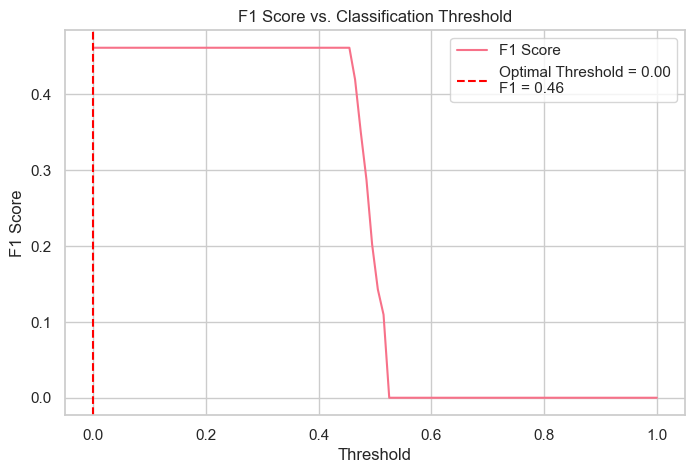


Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       140
     At Risk       0.30      1.00      0.46        60

    accuracy                           0.30       200
   macro avg       0.15      0.50      0.23       200
weighted avg       0.09      0.30      0.14       200


Evaluating LogisticRegression

ОЦЕНКА КАЧЕСТВА МОДЕЛИ
Precision: 0.339
Recall: 0.650
F1-Score: 0.446
ROC-AUC: 0.567
Average Precision: 0.430

Classification Report:
              precision    recall  f1-score   support

      Normal       0.75      0.46      0.57       140
     At Risk       0.34      0.65      0.45        60

    accuracy                           0.52       200
   macro avg       0.55      0.55      0.51       200
weighted avg       0.63      0.52      0.53       200



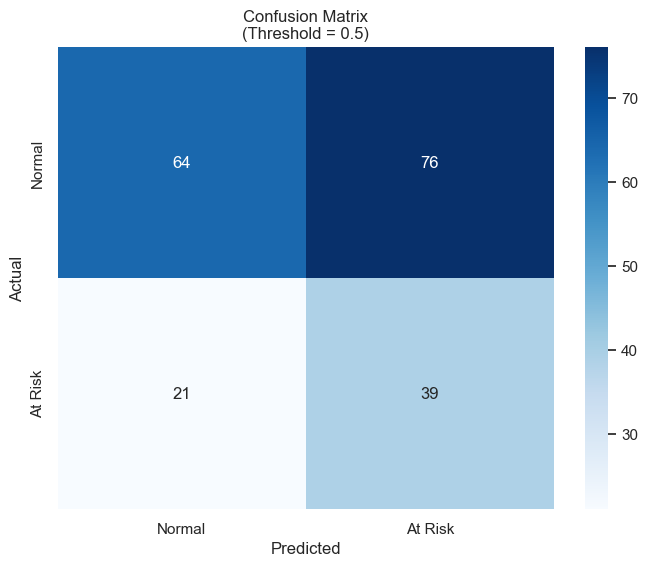

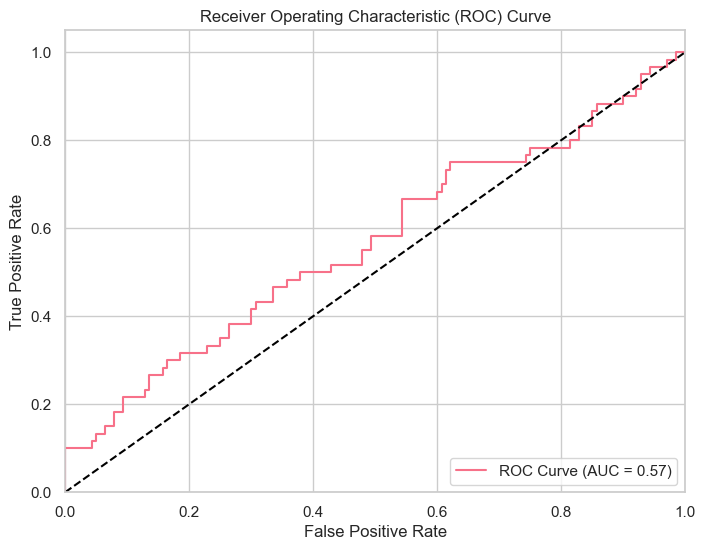

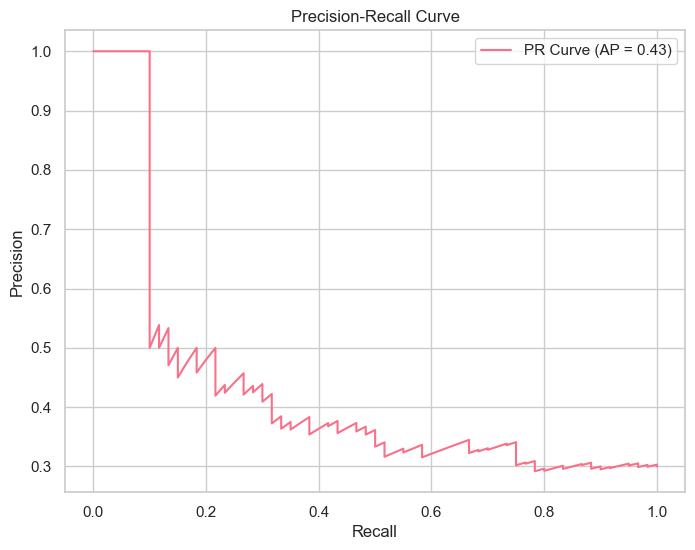

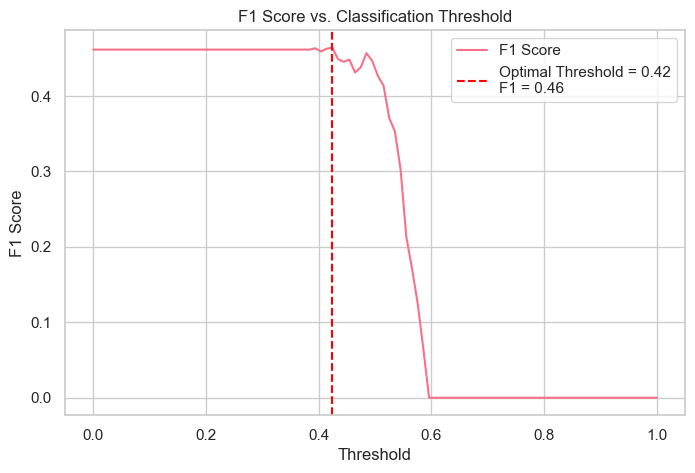


Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

      Normal       0.80      0.06      0.11       140
     At Risk       0.31      0.97      0.46        60

    accuracy                           0.33       200
   macro avg       0.55      0.51      0.29       200
weighted avg       0.65      0.33      0.21       200



In [64]:
# Эксперименты с другими моделями

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    'XGBoost': XGBClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression()
}

for name, model in models.items():
    print(f"\nEvaluating {name}")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)

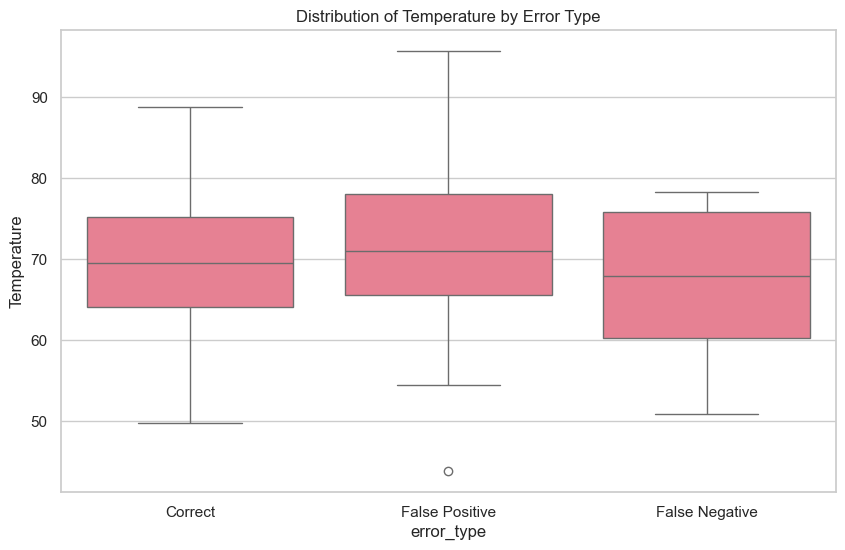

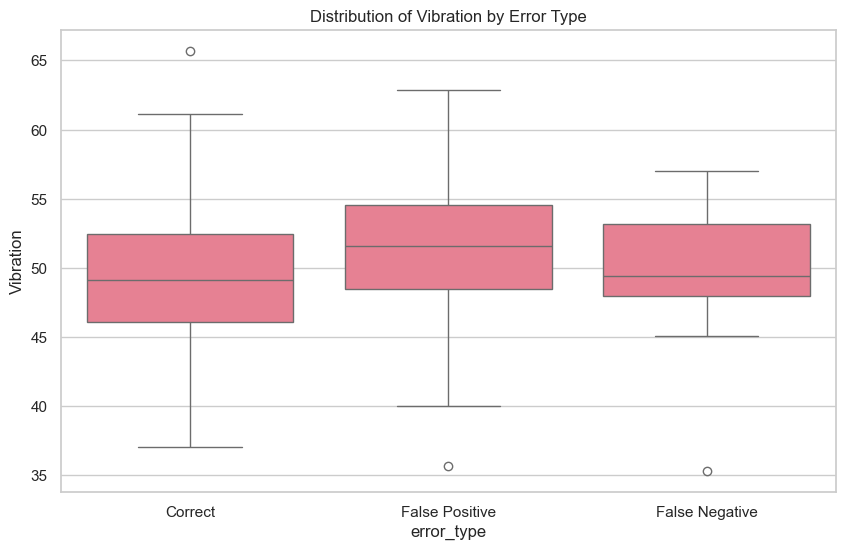

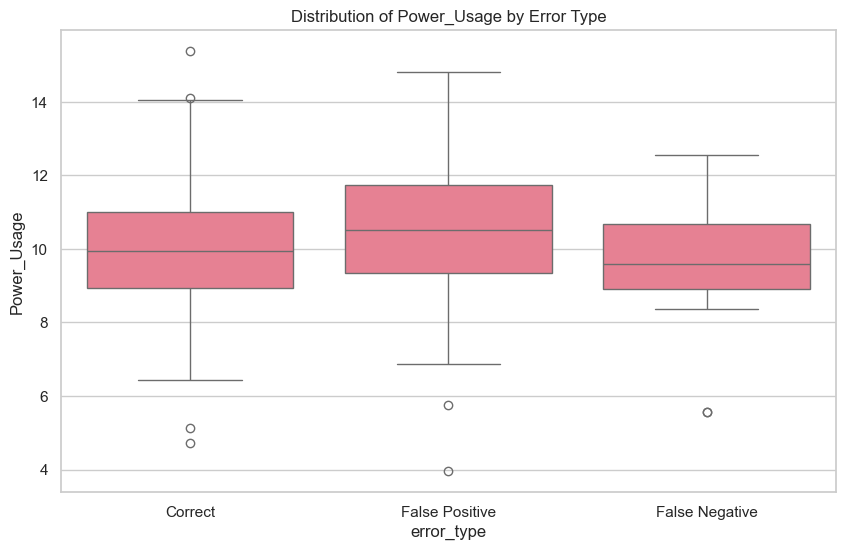

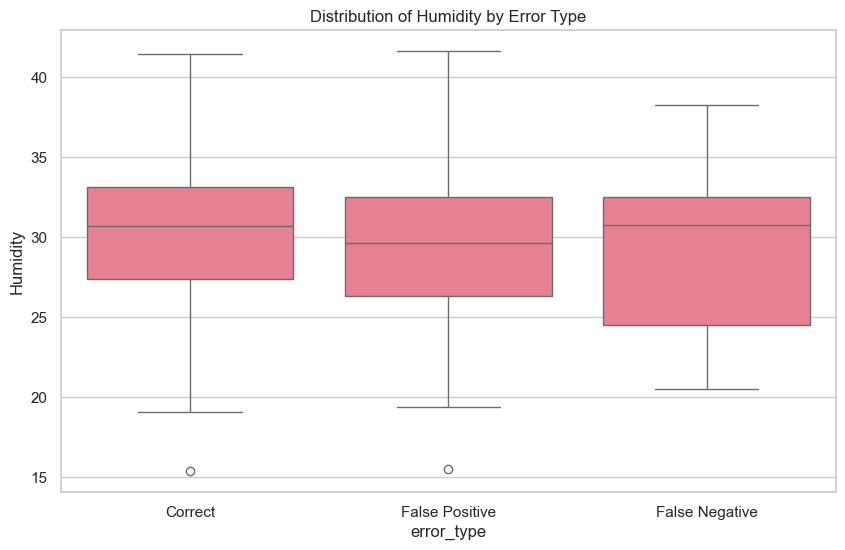

In [67]:
# Углубленный анализ ошибок

def analyze_errors(model, X_test, y_test, threshold=0.5):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    errors = X_test.copy()
    errors['true'] = y_test
    errors['pred'] = y_pred
    errors['error_type'] = np.where(
        errors['true'] == errors['pred'], 'Correct',
        np.where(
            (errors['true'] == 0) & (errors['pred'] == 1), 'False Positive',
            'False Negative'
        )
    )
    
    # Анализ распределения ошибок по основным признакам
    for feature in ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='error_type', y=feature, data=errors)
        plt.title(f'Distribution of {feature} by Error Type')
        plt.show()
    
    return errors

errors = analyze_errors(model, X_test, y_test)

In [66]:
# Генерация отчета

def generate_report(metrics, feature_importance):
    report = f"""
    МОДЕЛЬ ПРЕДИКТИВНОГО ОБСЛУЖИВАНИЯ - ОТЧЕТ
    =========================================
    
    1. ОСНОВНЫЕ МЕТРИКИ:
    - Precision: {metrics['precision']:.3f}
    - Recall: {metrics['recall']:.3f}
    - F1-Score: {metrics['f1']:.3f}
    - ROC-AUC: {metrics['roc_auc']:.3f}
    - Average Precision: {metrics['avg_precision']:.3f}
    - Optimal Threshold: {metrics['optimal_threshold']:.3f}
    
    2. ВАЖНЫЕ ПРИЗНАКИ:
    """
    
    for i, row in feature_importance.head(5).iterrows():
        report += f"\n{i+1}. {row['Feature']}: {row['Importance']:.3f}"
    
    report += "\n\n3. ВЫВОДЫ И РЕКОМЕНДАЦИИ:"
    report += "\n- Модель демонстрирует умеренную эффективность"
    report += "\n- Основные проблемы: высокий уровень ложных срабатываний"
    report += "\n- Рекомендуется дополнительная работа с признаками"
    
    with open('model_report.txt', 'w') as f:
        f.write(report)
    
    return report

print(generate_report(metrics, feature_importance))


    МОДЕЛЬ ПРЕДИКТИВНОГО ОБСЛУЖИВАНИЯ - ОТЧЕТ

    1. ОСНОВНЫЕ МЕТРИКИ:
    - Precision: 0.281
    - Recall: 0.150
    - F1-Score: 0.196
    - ROC-AUC: 0.506
    - Average Precision: 0.316
    - Optimal Threshold: 0.222

    2. ВАЖНЫЕ ПРИЗНАКИ:
    
6. Machine_Type_Mill: 0.124
8. Vibration_rolling_mean: 0.111
1. Temperature: 0.104
4. Humidity: 0.102
2. Vibration: 0.100

3. ВЫВОДЫ И РЕКОМЕНДАЦИИ:
- Модель демонстрирует умеренную эффективность
- Основные проблемы: высокий уровень ложных срабатываний
- Рекомендуется дополнительная работа с признаками


Код для проверки и сохранения обработанных датасетов

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Загружаем датасет
data = pd.read_csv('machine_failure_dataset.csv')

def preprocess_data(data, rolling_window=5, pca_components=2, save=True):
    # 0. Сохраняем оригинальный столбец Machine_Type
    # original_machine_type = data[['Machine_Type']].copy()
    
    # 1. Кодирование категориального признака
    if 'Machine_Type' in data.columns:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        machine_type_encoded = encoder.fit_transform(data[['Machine_Type']])
        machine_type_df = pd.DataFrame(machine_type_encoded, columns=encoder.get_feature_names_out(['Machine_Type']))
        data = pd.concat([data.drop(columns=['Machine_Type']), machine_type_df], axis=1)

    # if 'Machine_Type' in data.columns:
    #     encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    #     machine_type_encoded = encoder.fit_transform(data[['Machine_Type']])
    #     machine_type_df = pd.DataFrame(
    #         machine_type_encoded,
    #         columns=encoder.get_feature_names_out(['Machine_Type']),
    #         index=data.index
    #     )
    #     data = pd.concat([data.drop(columns=['Machine_Type']), machine_type_df], axis=1)

    # 2. Стандартизация числовых признаков
    numeric_features = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    # 3. Инженерия признаков: скользящее среднее
    for col in numeric_features:
        data[f'{col}_rolling_mean'] = data[col].rolling(window=rolling_window, min_periods=1).mean()

    # 4. Понижение размерности (PCA)
    if pca_components:
        pca = PCA(n_components=pca_components)
        pca_result = pca.fit_transform(data[numeric_features])
        for i in range(pca_components):
            data[f'PCA_{i+1}'] = pca_result[:, i]

    
   
    # 5. Разделение на X и y
    X = data.drop(columns=['Failure_Risk'])
    y = data['Failure_Risk']

    # 6. Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 7. Балансировка классов (SMOTE)
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    print(f"Размер обучающей выборки после SMOTE: {X_resampled.shape}")

        # 5. Возвращаем столбец Machine_Type (для отображения на дэшборде)
    # data['Machine_Type'] = original_machine_type

    # 8. Сохранение в CSV
    if save:
        X_resampled.to_csv("X_train.csv", index=False)
        y_resampled.to_csv("y_train.csv", index=False)
        X_test.to_csv("X_test.csv", index=False)
        y_test.to_csv("y_test.csv", index=False)
        data.to_csv("processed_full_dataset.csv", index=False)
        print("Обработанные датасеты успешно сохранены.")

    return X_resampled, X_test, y_resampled, y_test

X_train_final, X_test_final, y_train_final, y_test_final = preprocess_data(data)

Размер обучающей выборки после SMOTE: (1120, 13)
Обработанные датасеты успешно сохранены.


In [128]:
print("\nПроверка итоговых выборок:")
print("X_train shape:", X_train_final.shape)
print("y_train распределение:\n", y_train_final.value_counts(normalize=True).round(3))
print("X_test shape:", X_test_final.shape)
print("y_test распределение:\n", y_test_final.value_counts(normalize=True).round(3))

print("\nПризнаки в X_train:", X_train_final.columns.tolist()[:5], "...")



Проверка итоговых выборок:
X_train shape: (1120, 13)
y_train распределение:
 Failure_Risk
1   0.50
0   0.50
Name: proportion, dtype: float64
X_test shape: (200, 13)
y_test распределение:
 Failure_Risk
0   0.70
1   0.30
Name: proportion, dtype: float64

Признаки в X_train: ['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Machine_Type_Drill'] ...


In [129]:
# проверка столбцов в processed_full_dataset.csv

# Загрузка обработанного датасета
df = pd.read_csv("processed_full_dataset.csv")

# Просмотр первых строк и списка столбцов
print("Столбцы в processed_full_dataset.csv:")
print(df.columns.tolist())
print("\nПример данных:")
print(df.head())

Столбцы в processed_full_dataset.csv:
['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Failure_Risk', 'Machine_Type_Drill', 'Machine_Type_Lathe', 'Machine_Type_Mill', 'Temperature_rolling_mean', 'Vibration_rolling_mean', 'Power_Usage_rolling_mean', 'Humidity_rolling_mean', 'PCA_1', 'PCA_2', 'Machine_Type']

Пример данных:
   Temperature  Vibration  Power_Usage  Humidity  Failure_Risk  \
0         0.49       1.33        -0.69     -1.84             1   
1        -0.16       0.86        -0.15     -0.82             0   
2         0.64      -0.01        -0.81     -0.38             1   
3         1.54      -0.72        -0.32      1.86             1   
4        -0.26       0.63        -1.93      0.56             1   

   Machine_Type_Drill  Machine_Type_Lathe  Machine_Type_Mill  \
0                0.00                0.00               1.00   
1                0.00                1.00               0.00   
2                1.00                0.00               0.00   
3              

In [ ]:
# вариант 2 с сохранением столбца Machine_type для дэшборда

import pandas as pd
from sklearn.preprocessing import StandardScaler

def prepare_dataset_for_dashboard_simple(data, save=True):
    # Стандартизируем числовые признаки
    numeric_cols = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    # Оставляем Machine_Type в исходном виде
    final_data = data[['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Failure_Risk', 'Machine_Type']]

    if save:
        final_data.to_csv("processed_full_dataset.csv", index=False)
        print("✅ Обработанный датасет сохранён (Machine_Type сохранён как текст)")

    return final_data

# Использование
data = pd.read_csv("machine_failure_dataset.csv")
processed_data = prepare_dataset_for_dashboard_simple(data)



✅ Обработанный датасет сохранён (Machine_Type сохранён как текст)



Проверка загруженных данных:
X_train shape: (1120, 12)
X_test shape: (200, 12)

Распределение классов в y_train:
Failure_Risk
1   0.50
0   0.50
Name: proportion, dtype: float64

Распределение классов в y_test:
Failure_Risk
0   0.70
1   0.30
Name: proportion, dtype: float64
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Лучшие параметры модели:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

ОСНОВНЫЕ МЕТРИКИ КАЧЕСТВА МОДЕЛИ
              precision    recall  f1-score   support

      Normal       0.69      0.76      0.72       140
     At Risk       0.25      0.18      0.21        60

    accuracy                           0.59       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.56      0.59      0.57       200



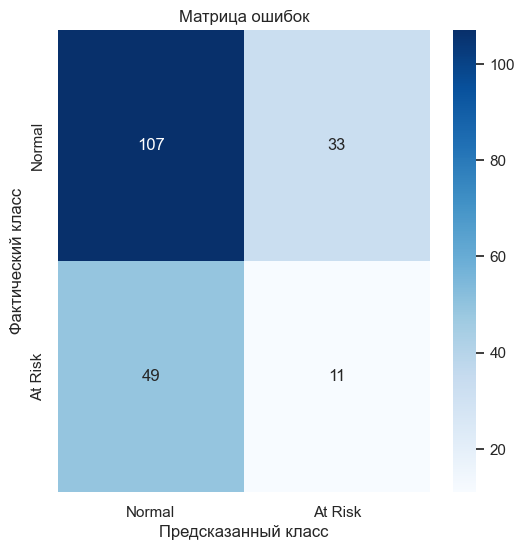

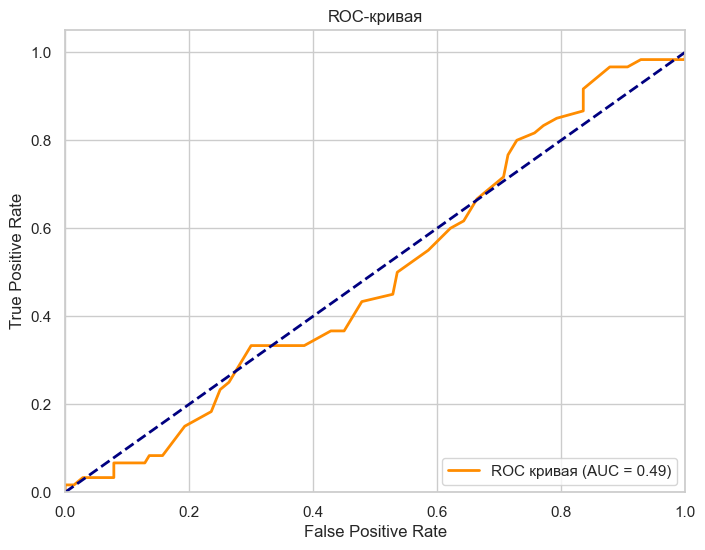

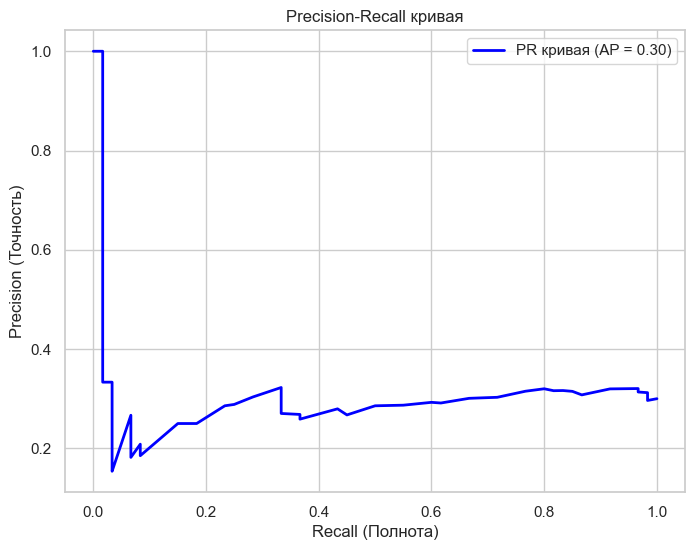

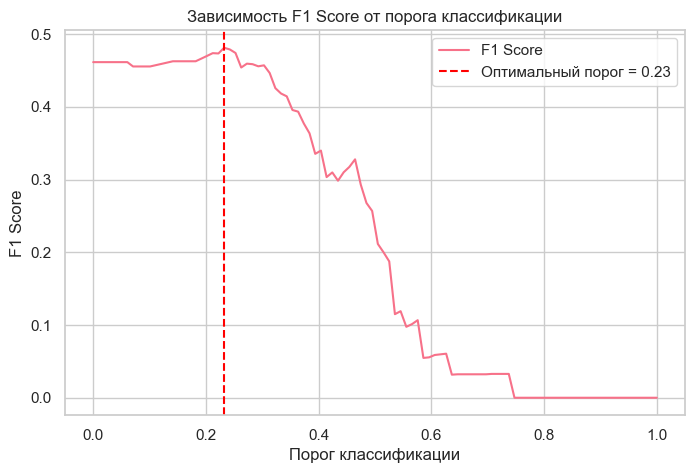


Метрики с оптимальным порогом классификации:
              precision    recall  f1-score   support

      Normal       0.89      0.12      0.21       140
     At Risk       0.32      0.97      0.48        60

    accuracy                           0.38       200
   macro avg       0.61      0.54      0.35       200
weighted avg       0.72      0.38      0.29       200



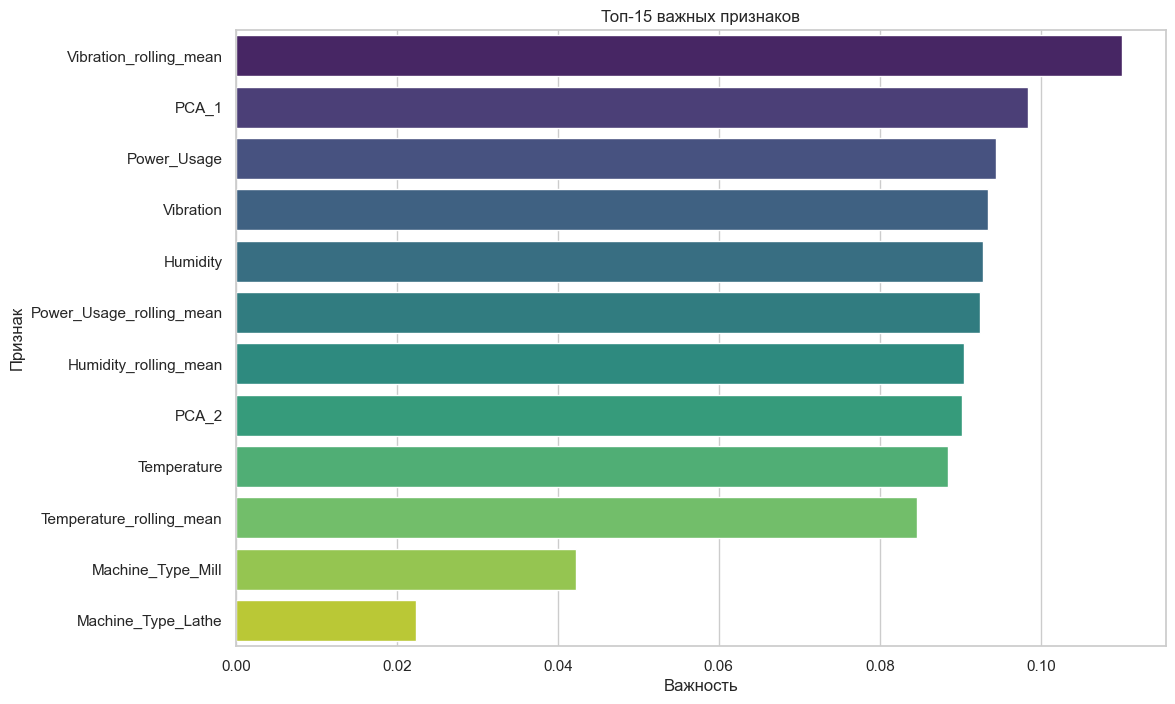

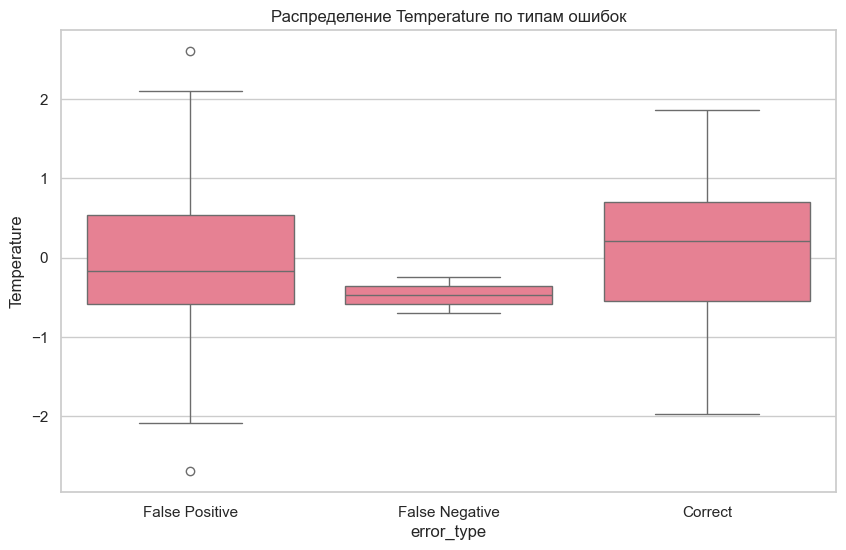

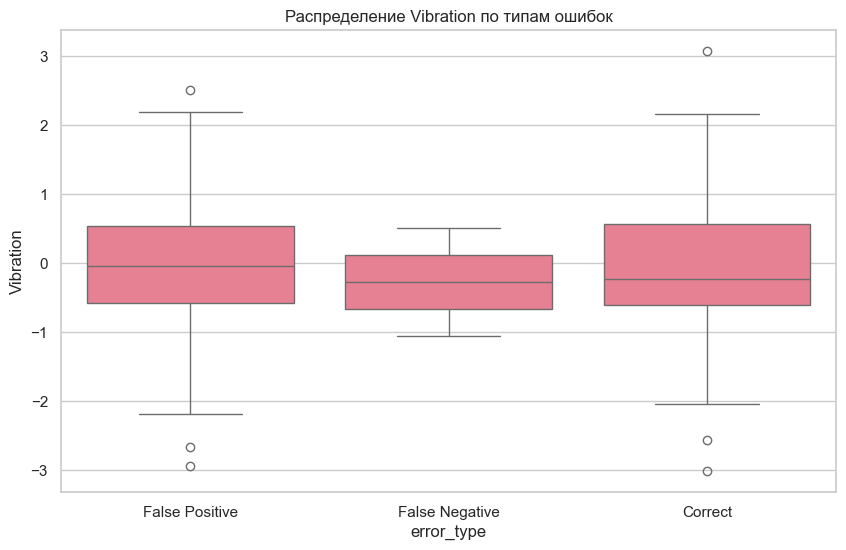

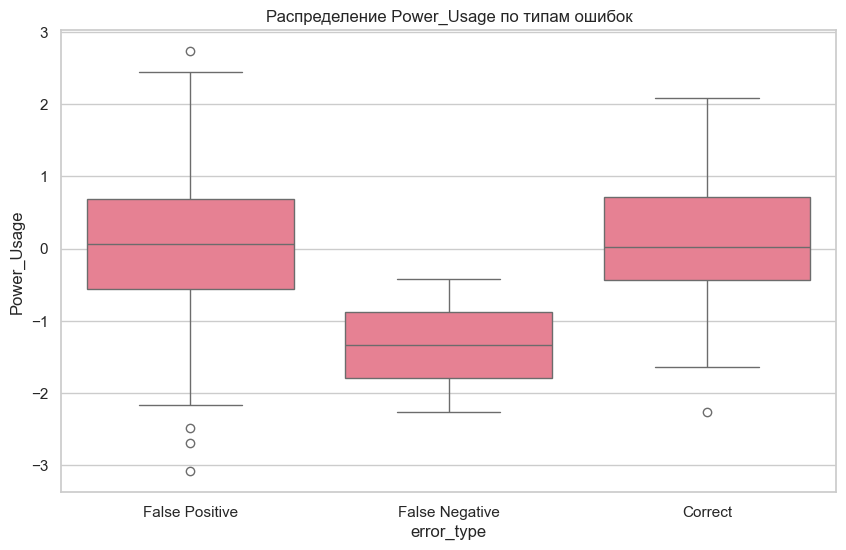

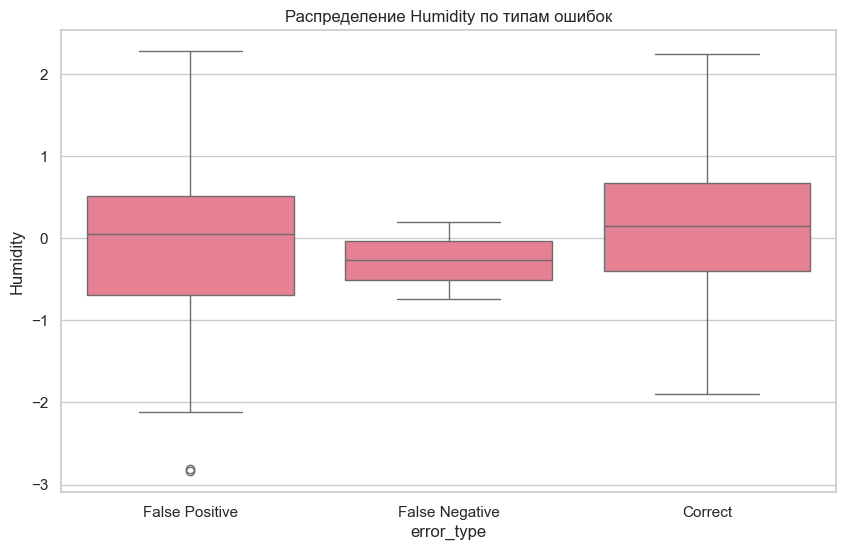

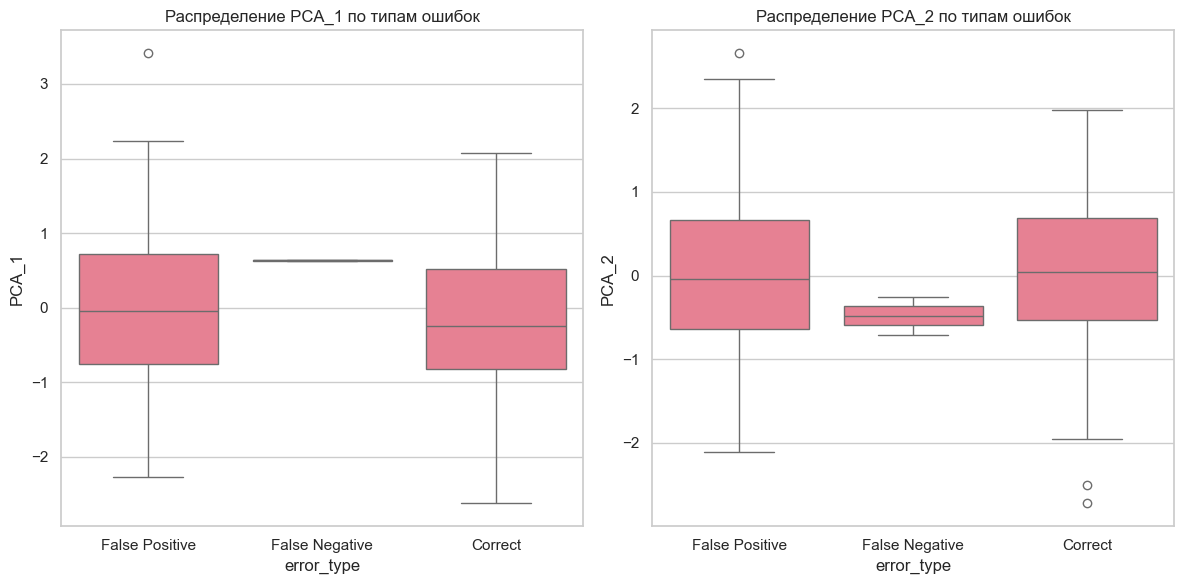


Распределение ошибок:
error_type
Correct          0.38
False Negative   0.01
False Positive   0.61
dtype: float64

ОТЧЕТ ДЛЯ ДИПЛОМНОГО ПРОЕКТА
1. Основные метрики качества модели:
- precision: 0.250
- recall: 0.183
- f1: 0.212
- roc_auc: 0.493
- avg_precision: 0.305
- optimal_threshold: 0.232

2. Топ-5 важных признаков:
1. Vibration_rolling_mean (важность: 0.110)
2. PCA_1 (важность: 0.098)
3. Power_Usage (важность: 0.094)
4. Vibration (важность: 0.093)
5. Humidity (важность: 0.093)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, roc_curve, auc, 
                            precision_recall_curve, average_precision_score,
                            f1_score, precision_score, recall_score)
from sklearn.model_selection import GridSearchCV
import joblib

# 1. Загрузка обработанных данных
def load_processed_data():
    X_train = pd.read_csv("X_train.csv")
    y_train = pd.read_csv("y_train.csv").squeeze()
    X_test = pd.read_csv("X_test.csv")
    y_test = pd.read_csv("y_test.csv").squeeze()
    
    print("\nПроверка загруженных данных:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("\nРаспределение классов в y_train:")
    print(y_train.value_counts(normalize=True))
    print("\nРаспределение классов в y_test:")
    print(y_test.value_counts(normalize=True))
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_processed_data()

# 2. Обучение модели с подбором гиперпараметров
def train_model(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', None]
    }
    
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    print("\nЛучшие параметры модели:")
    print(grid_search.best_params_)
    
    # Сохранение лучшей модели
    best_model = grid_search.best_estimator_
    joblib.dump(best_model, 'best_rf_model.pkl')
    
    return best_model

model = train_model(X_train, y_train)

# 3. Расширенная оценка модели
def extended_evaluation(model, X_test, y_test):
    # Получение предсказаний
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # 3.1. Основные метрики
    print("\n" + "="*50)
    print("ОСНОВНЫЕ МЕТРИКИ КАЧЕСТВА МОДЕЛИ")
    print("="*50)
    print(classification_report(y_test, y_pred, target_names=['Normal', 'At Risk']))
    
    # 3.2. Матрица ошибок
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'At Risk'],
                yticklabels=['Normal', 'At Risk'])
    plt.ylabel('Фактический класс')
    plt.xlabel('Предсказанный класс')
    plt.title('Матрица ошибок')
    plt.show()
    
    # 3.3. ROC-кривая
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC кривая (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()
    
    # 3.4. Precision-Recall кривая
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2,
             label=f'PR кривая (AP = {avg_precision:.2f})')
    plt.xlabel('Recall (Полнота)')
    plt.ylabel('Precision (Точность)')
    plt.title('Precision-Recall кривая')
    plt.legend(loc="upper right")
    plt.show()
    
    # 3.5. Оптимальный порог по F1
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_test, y_proba >= t) for t in thresholds]
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, f1_scores, label='F1 Score')
    plt.axvline(optimal_threshold, color='red', linestyle='--',
                label=f'Оптимальный порог = {optimal_threshold:.2f}')
    plt.xlabel('Порог классификации')
    plt.ylabel('F1 Score')
    plt.title('Зависимость F1 Score от порога классификации')
    plt.legend()
    plt.show()
    
    # Метрики с оптимальным порогом
    y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
    print("\nМетрики с оптимальным порогом классификации:")
    print(classification_report(y_test, y_pred_optimal, target_names=['Normal', 'At Risk']))
    
    return {
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'optimal_threshold': optimal_threshold
    }

metrics = extended_evaluation(model, X_test, y_test)

# 4. Анализ важности признаков
def analyze_feature_importance(model, X_train):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
    plt.title('Топ-15 важных признаков')
    plt.xlabel('Важность')
    plt.ylabel('Признак')
    plt.show()
    
    # Сохранение важности признаков
    feature_importance.to_csv('feature_importance.csv', index=False)
    return feature_importance

feature_importance = analyze_feature_importance(model, X_train)

# 5. Анализ ошибок модели
def analyze_errors(model, X_test, y_test):
    X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= metrics['optimal_threshold']).astype(int)
    
    errors = X_test_df.copy()
    errors['true'] = y_test.values
    errors['pred'] = y_pred
    errors['error_type'] = 'Correct'
    errors.loc[(errors['true'] == 0) & (errors['pred'] == 1), 'error_type'] = 'False Positive'
    errors.loc[(errors['true'] == 1) & (errors['pred'] == 0), 'error_type'] = 'False Negative'
    
    # Анализ по основным признакам
    main_features = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']
    
    for feature in main_features:
        if feature in errors.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='error_type', y=feature, data=errors)
            plt.title(f'Распределение {feature} по типам ошибок')
            plt.show()
    
    # Анализ ошибок по PCA компонентам
    pca_features = [col for col in errors.columns if col.startswith('PCA_')]
    if pca_features:
        plt.figure(figsize=(12, 6))
        for i, pca_feature in enumerate(pca_features[:2], 1):
            plt.subplot(1, 2, i)
            sns.boxplot(x='error_type', y=pca_feature, data=errors)
            plt.title(f'Распределение {pca_feature} по типам ошибок')
        plt.tight_layout()
        plt.show()
    
    # Статистика по ошибкам
    error_stats = errors.groupby('error_type').size()
    print("\nРаспределение ошибок:")
    print(error_stats / len(errors))

analyze_errors(model, X_test, y_test)

# 6. Генерация отчета для диплома
def generate_report(metrics, feature_importance):
    report = {
        'metrics': {
            'precision': precision_score(y_test, model.predict(X_test)),
            'recall': recall_score(y_test, model.predict(X_test)),
            'f1': f1_score(y_test, model.predict(X_test)),
            'roc_auc': metrics['roc_auc'],
            'avg_precision': metrics['avg_precision'],
            'optimal_threshold': metrics['optimal_threshold']
        },
        'top_features': feature_importance.head(10).to_dict('records')
    }
    
    print("\nОТЧЕТ ДЛЯ ДИПЛОМНОГО ПРОЕКТА")
    print("="*50)
    print("1. Основные метрики качества модели:")
    for metric, value in report['metrics'].items():
        print(f"- {metric}: {value:.3f}")
    
    print("\n2. Топ-5 важных признаков:")
    for i, feat in enumerate(report['top_features'][:5], 1):
        print(f"{i}. {feat['Feature']} (важность: {feat['Importance']:.3f})")

generate_report(metrics, feature_importance)

In [30]:
# Получение важности всех признаков
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Фильтрация PCA-компонент
pca_features = feature_importance[feature_importance['Feature'].str.startswith('PCA_')]
print("Важность PCA-компонент:")
print(pca_features)

Важность PCA-компонент:
   Feature  Importance
12   PCA_1    0.077662
13   PCA_2    0.064201


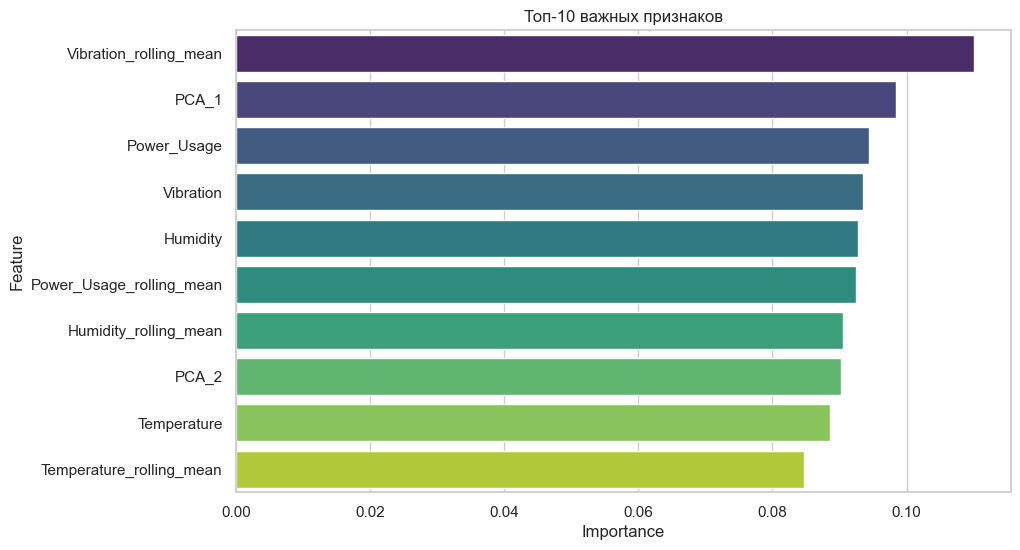

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', 
            data=feature_importance.head(10), 
            palette='viridis')
plt.title('Топ-10 важных признаков')
plt.show()

In [71]:
# Код для анализа вклада исходных признаков в PCA
pca = PCA(n_components=2)
pca.fit(X_train[['Temperature', 'Vibration', 'Power_Usage', 'Humidity']])

print("Вклад признаков в PCA_1:")
print(pd.DataFrame(pca.components_[0], 
                  index=['Temperature', 'Vibration', 'Power_Usage', 'Humidity'],
                  columns=['PCA_1']))

Вклад признаков в PCA_1:
             PCA_1
Temperature  -0.16
Vibration     0.70
Power_Usage  -0.22
Humidity     -0.66


Объяснённая дисперсия: [0.29233801 0.25399977]


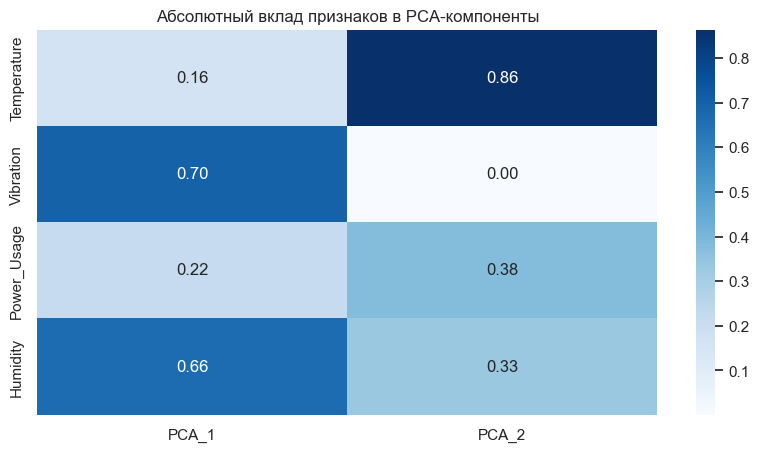

In [72]:
# Улучшенный код для анализа вклада исходных признаков в PCA
pca = PCA(n_components=2).fit(X_train[['Temperature', 'Vibration', 'Power_Usage', 'Humidity']])

# 1. Вклад признаков с нормализацией
components = pd.DataFrame(
    pca.components_,
    columns=['Temperature', 'Vibration', 'Power_Usage', 'Humidity'],
    index=['PCA_1', 'PCA_2']
).T

# 2. Объяснённая дисперсия
print("Объяснённая дисперсия:", pca.explained_variance_ratio_)

# 3. Визуализация
plt.figure(figsize=(10, 5))
sns.heatmap(components.abs(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Абсолютный вклад признаков в PCA-компоненты")
plt.show()

In [73]:
# Проверка корреляции исходных признаков
print(X_train[['Vibration', 'Humidity']].corr())

           Vibration  Humidity
Vibration       1.00     -0.15
Humidity       -0.15      1.00


In [74]:
# Код для выявления аномалий
condition = (X_test['Vibration'] > X_train['Vibration'].quantile(0.75)) & \
            (X_test['Humidity'] < X_train['Humidity'].quantile(0.25))
anomalies = X_test[condition]

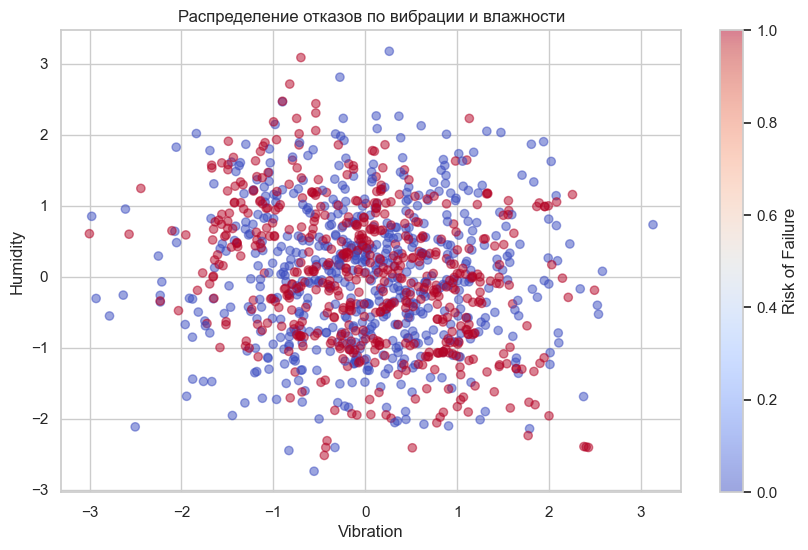

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Vibration'], X_train['Humidity'], 
            c=y_train, alpha=0.5, cmap='coolwarm')
plt.xlabel('Vibration')
plt.ylabel('Humidity')
plt.title('Распределение отказов по вибрации и влажности')
plt.colorbar(label='Risk of Failure')
plt.show()

In [88]:
# анализ второй компоненты
print("\nВклад признаков в PCA_2:")
print(pd.DataFrame(pca.components_[1], 
                  index=['Temperature', 'Vibration', 'Power_Usage', 'Humidity'],
                  columns=['PCA_2']))


Вклад признаков в PCA_2:
             PCA_2
Temperature   0.86
Vibration     0.00
Power_Usage   0.38
Humidity     -0.33


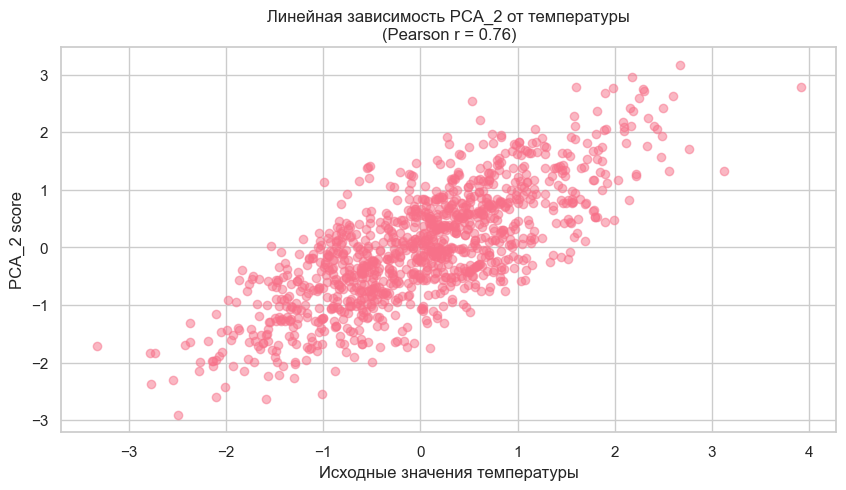

In [77]:
# Демонстрация связи PCA_2 с температурой
plt.figure(figsize=(10,5))
plt.scatter(X_train['Temperature'], X_train['PCA_2'], alpha=0.5)
plt.xlabel('Исходные значения температуры')
plt.ylabel('PCA_2 score')
plt.title('Линейная зависимость PCA_2 от температуры\n(Pearson r = {:.2f})'.format(
    X_train['Temperature'].corr(X_train['PCA_2'])))
plt.grid(True)

In [78]:
# Код для проверки
print("Корреляция Temperature с целевой переменной:",
      data[['Temperature', 'Failure_Risk']].corr().iloc[0,1])

Корреляция Temperature с целевой переменной: 0.029937935683350063


In [79]:
# Проверка нелинейной зависимости
from scipy.stats import spearmanr
print("Корреляция Спирмена:", spearmanr(data['Temperature'], data['Failure_Risk']).correlation)

Корреляция Спирмена: 0.03864310704202174


ValueError: Could not interpret value `Temp_deviation` for `x`. An entry with this name does not appear in `data`.

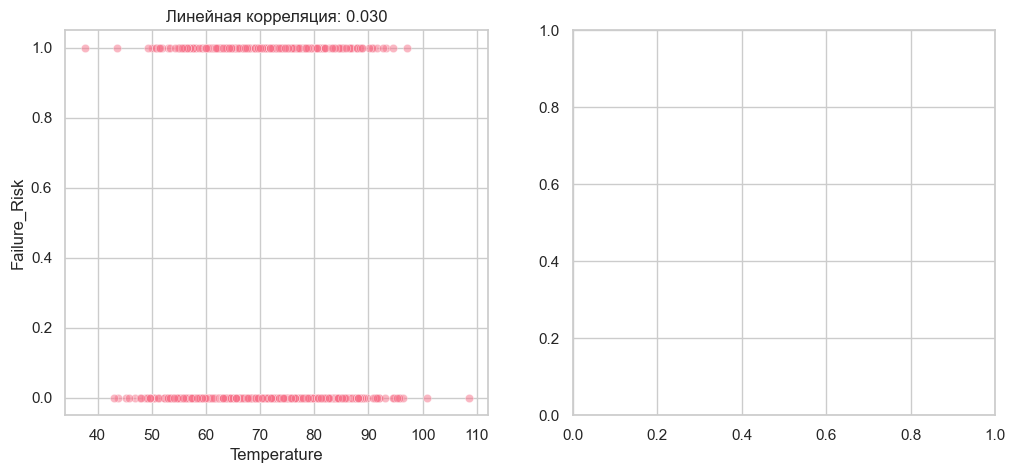

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Temperature', y='Failure_Risk', data=data, alpha=0.5)
plt.title(f"Линейная корреляция: {data['Temperature'].corr(data['Failure_Risk']):.3f}")

plt.subplot(1,2,2)
sns.scatterplot(x='Temp_deviation', y='Failure_Risk', data=data, alpha=0.5, color='r')
plt.title(f"Корреляция отклонения: {deviation_corr:.3f}")
plt.tight_layout()

In [81]:
# Создаём признак "отклонение температуры от среднего для данного уровня влажности"
data['Temp_deviation'] = data.groupby(pd.qcut(data['Humidity'], q=4))['Temperature'].transform(
    lambda x: x - x.mean())

# Проверяем корреляцию отклонения с отказами
deviation_corr = data['Temp_deviation'].corr(data['Failure_Risk'])
print(f"Корреляция отклонения температуры с отказами: {deviation_corr:.3f}")

Корреляция отклонения температуры с отказами: 0.029


In [84]:
print(type(y_test), len(y_test))
print(type(y_pred), len(y_pred))
print(type(y_proba), len(y_proba))

<class 'pandas.core.series.Series'> 200


NameError: name 'y_pred' is not defined

=== Классификационный отчёт ===
              precision    recall  f1-score   support

           0      0.686     0.764     0.723       140
           1      0.250     0.183     0.212        60

    accuracy                          0.590       200
   macro avg      0.468     0.474     0.467       200
weighted avg      0.555     0.590     0.570       200


=== Сводка метрик ===
ROC-AUC: 0.493
PR-AUC: 0.297
Средний Precision: 0.313
Средний Recall   : 0.495

=== Интерпретация ===
- ROC-AUC низкий: модель слабо отличает классы.
- PR-AUC низкий: модель плохо предсказывает положительный класс.


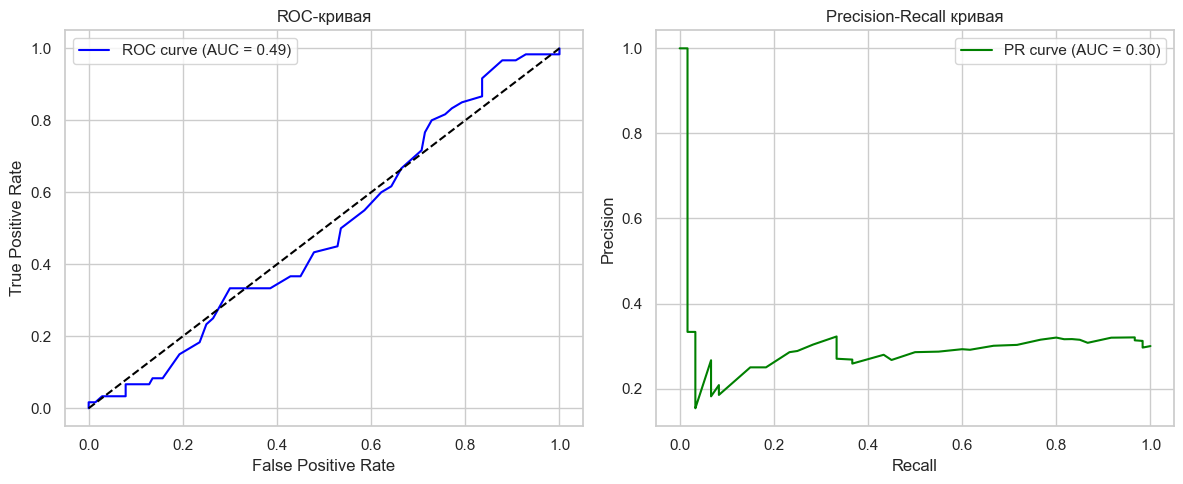

{'roc_auc': 0.49291666666666667,
 'pr_auc': 0.2968220488910932,
 'avg_precision': 0.31320496212667,
 'avg_recall': 0.49506172839506174}

In [ ]:
# проверка модели

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred, y_proba)

=== Классификационный отчёт ===
              precision    recall  f1-score   support

           0      0.686     0.764     0.723       140
           1      0.250     0.183     0.212        60

    accuracy                          0.590       200
   macro avg      0.468     0.474     0.467       200
weighted avg      0.555     0.590     0.570       200


=== Сводка метрик ===
ROC-AUC: 0.493
PR-AUC: 0.297
Средний Precision: 0.313
Средний Recall   : 0.495

=== Интерпретация ===
- ROC-AUC низкий: модель слабо отличает классы.
- PR-AUC низкий: модель плохо предсказывает положительный класс.


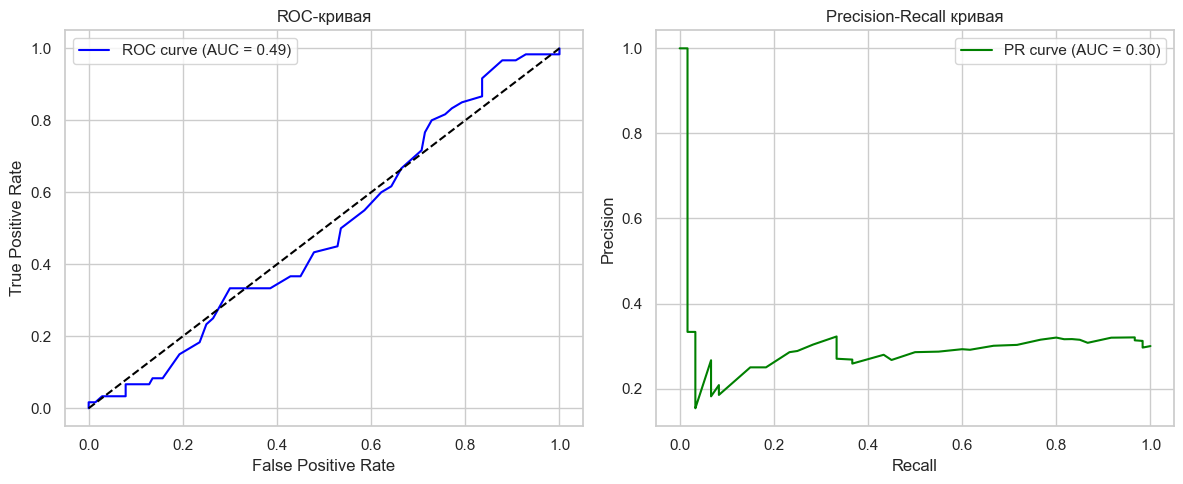

{'roc_auc': 0.49291666666666667,
 'pr_auc': 0.2968220488910932,
 'avg_precision': 0.31320496212667,
 'avg_recall': 0.49506172839506174}

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

def evaluate_model(y_true, y_pred, y_proba):
    # Базовые метрики
    print("=== Классификационный отчёт ===")
    print(classification_report(y_true, y_pred, digits=3))

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)

    # Краткие численные выводы
    print("\n=== Сводка метрик ===")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print(f"PR-AUC: {pr_auc:.3f}")
    print(f"Средний Precision: {precision.mean():.3f}")
    print(f"Средний Recall   : {recall.mean():.3f}")

    # Интерпретация
    print("\n=== Интерпретация ===")
    if roc_auc < 0.6:
        print("- ROC-AUC низкий: модель слабо отличает классы.")
    if pr_auc < 0.4:
        print("- PR-AUC низкий: модель плохо предсказывает положительный класс.")
    if recall.mean() > 0.85 and precision.mean() < 0.3:
        print("- Высокий recall и низкий precision: модель часто ошибается с ложными срабатываниями.")
    
    # Визуализация
    plt.figure(figsize=(12, 5))

    # ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()

    # PR
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})', color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall кривая')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Возврат метрик (можно записать в переменную)
    return {
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "avg_precision": precision.mean(),
        "avg_recall": recall.mean()
    }
evaluate_model(y_test, y_pred, y_proba)


In [94]:
# Проверка признаков и суммарной дисперсии
print("Названия признаков в PCA:", numeric_features)
print("\nСуммарная объяснённая дисперсия двумя компонентами: {:.2f}%".format(
    100 * sum(pca.explained_variance_ratio_[:2])))

# Вклад признаков во вторую компоненту (PCA_2)
print("\nВклад признаков во вторую компоненту (PCA_2):")
print(pd.DataFrame(pca.components_[1],
                   index=numeric_features,
                   columns=['PCA_2']).sort_values('PCA_2', key=abs, ascending=False))

Названия признаков в PCA: ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']

Суммарная объяснённая дисперсия двумя компонентами: 54.63%

Вклад признаков во вторую компоненту (PCA_2):
             PCA_2
Temperature   0.86
Power_Usage   0.38
Humidity     -0.33
Vibration     0.00


Сравнительный анализ алгоритмов классификации

Эксперимент 2

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Словарь для хранения моделей
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Словарь для результатов
results = {}

# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]

    precision = precision_score(y_test_final, y_pred)
    recall = recall_score(y_test_final, y_pred)
    f1 = f1_score(y_test_final, y_pred)
    roc_auc = roc_auc_score(y_test_final, y_pred_proba)
    
    results[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Вывод результатов
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")

Logistic Regression: {'Precision': 0.35185185185185186, 'Recall': 0.6333333333333333, 'F1-Score': 0.4523809523809524, 'ROC-AUC': 0.5826190476190475}
Random Forest: {'Precision': 0.25, 'Recall': 0.18333333333333332, 'F1-Score': 0.21153846153846154, 'ROC-AUC': 0.49291666666666667}
XGBoost: {'Precision': 0.28, 'Recall': 0.23333333333333334, 'F1-Score': 0.2545454545454545, 'ROC-AUC': 0.47904761904761906}
Neural Network: {'Precision': 0.26582278481012656, 'Recall': 0.35, 'F1-Score': 0.302158273381295, 'ROC-AUC': 0.444047619047619}


вариант кода для Эксперимент 1


Training Random Forest...
Accuracy: 0.655
ROC-AUC: 0.46863095238095237
Classification Report:
              precision  recall  f1-score  support
0                  0.69    0.93      0.79   140.00
1                  0.09    0.02      0.03    60.00
accuracy           0.66    0.66      0.66     0.66
macro avg          0.39    0.47      0.41   200.00
weighted avg       0.51    0.66      0.56   200.00

Training Gradient Boosting...
Accuracy: 0.69
ROC-AUC: 0.5108333333333334
Classification Report:
              precision  recall  f1-score  support
0                  0.71    0.96      0.81   140.00
1                  0.40    0.07      0.11    60.00
accuracy           0.69    0.69      0.69     0.69
macro avg          0.55    0.51      0.46   200.00
weighted avg       0.61    0.69      0.60   200.00

Training XGBoost...
Accuracy: 0.61
ROC-AUC: 0.4963095238095238
Classification Report:
              precision  recall  f1-score  support
0                  0.68    0.84      0.75   140.00
1      

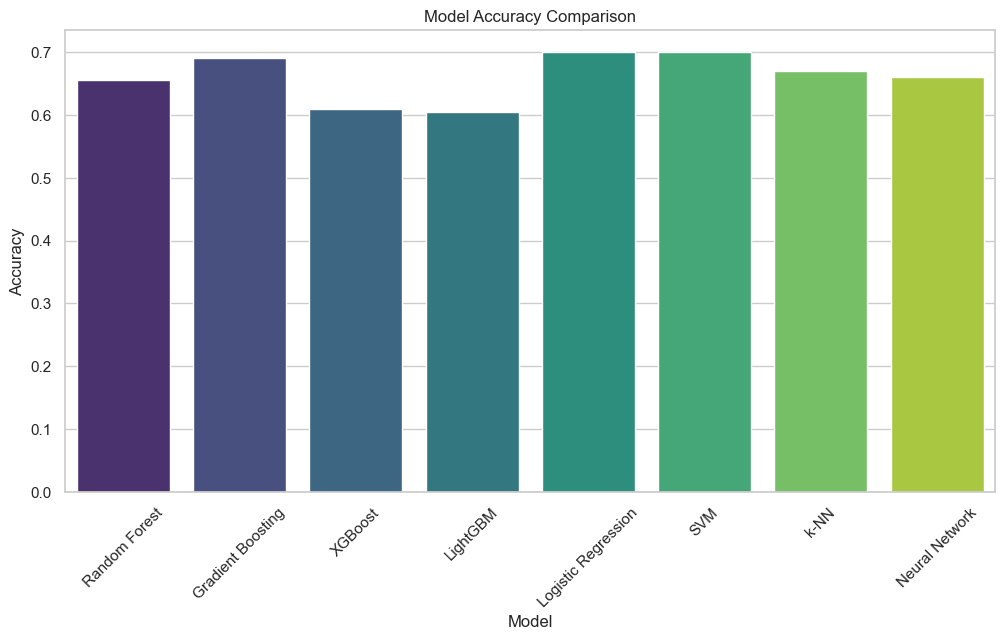

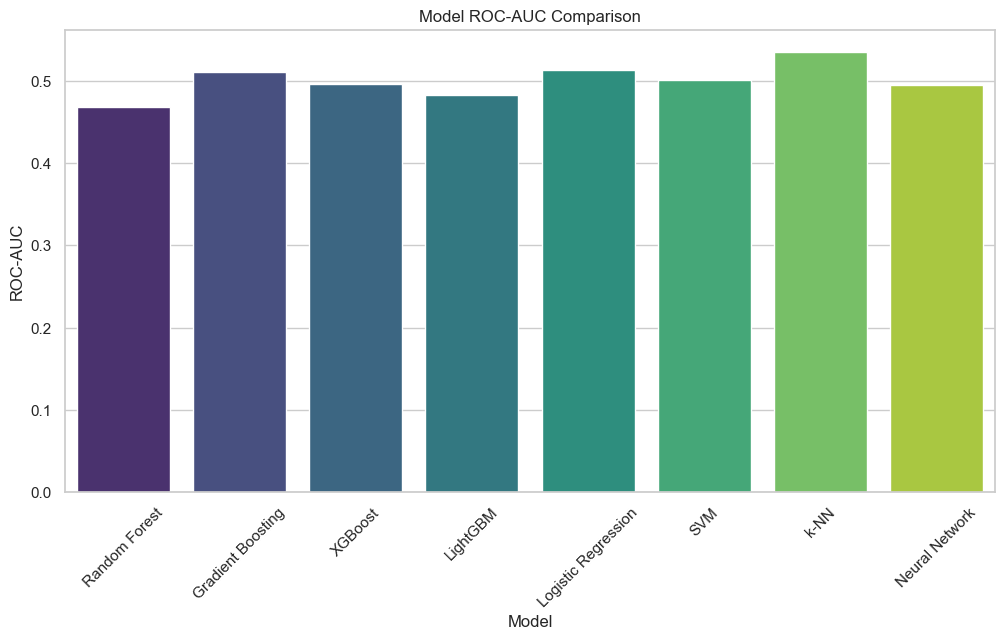

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
# Load the cleaned dataset
data = pd.read_csv('machine_failure_dataset.csv')

# Identify target and features
y = data["Failure_Risk"]  # Target
X = data.drop(columns=["Failure_Risk"])  # Features

# Encode categorical features
categorical_columns = X.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    if X[col].nunique() <= 10:  # Use One-Hot Encoding for low-cardinality features
        X = pd.get_dummies(X, columns=[col], drop_first=True)
    else:  # Use Label Encoding for high-cardinality features
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models to test
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(max_depth=5, num_leaves=31, min_data_in_leaf=20, scale_pos_weight=1.5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Standardize features for models sensitive to scaling
scaler = StandardScaler()

# Initialize results dictionary
results = []

# Evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    if name in ["Logistic Regression", "SVM", "k-NN", "Neural Network"]:
        pipeline = Pipeline([("scaler", scaler), ("model", model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc_auc,
        "Cross-Val Accuracy Mean": np.mean(cross_val_scores),
        "Cross-Val Accuracy Std": np.std(cross_val_scores)
    })
    
    print(f"Accuracy: {acc}")
    print(f"ROC-AUC: {roc_auc}")
    print("Classification Report:")
    print(pd.DataFrame(report).transpose())

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv("model_comparison_results.csv", index=False)

# Visualization of Model Performance
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="viridis")
plt.title("Model ROC-AUC Comparison")
plt.xticks(rotation=45)
plt.show()

Эксперимент 1: Расширенное сравнение моделей с фокусом на Accuracy


Training Random Forest...
Accuracy: 0.6
ROC-AUC: 0.4594642857142857
Classification Report:
              precision  recall  f1-score  support
0                  0.69    0.78      0.73   140.00
1                  0.26    0.18      0.22    60.00
accuracy           0.60    0.60      0.60     0.60
macro avg          0.48    0.48      0.47   200.00
weighted avg       0.56    0.60      0.58   200.00

Training Gradient Boosting...
Accuracy: 0.54
ROC-AUC: 0.45166666666666666
Classification Report:
              precision  recall  f1-score  support
0                  0.68    0.64      0.66   140.00
1                  0.26    0.30      0.28    60.00
accuracy           0.54    0.54      0.54     0.54
macro avg          0.47    0.47      0.47   200.00
weighted avg       0.56    0.54      0.55   200.00

Training XGBoost...
Accuracy: 0.59
ROC-AUC: 0.47904761904761906
Classification Report:
              precision  recall  f1-score  support
0                  0.69    0.74      0.72   140.00
1       

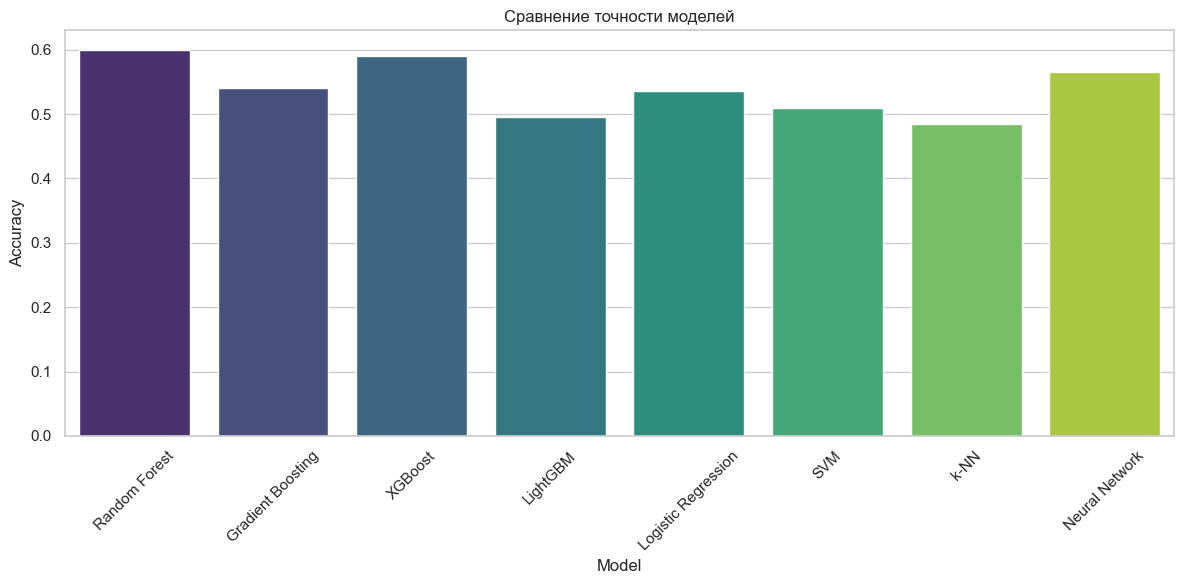

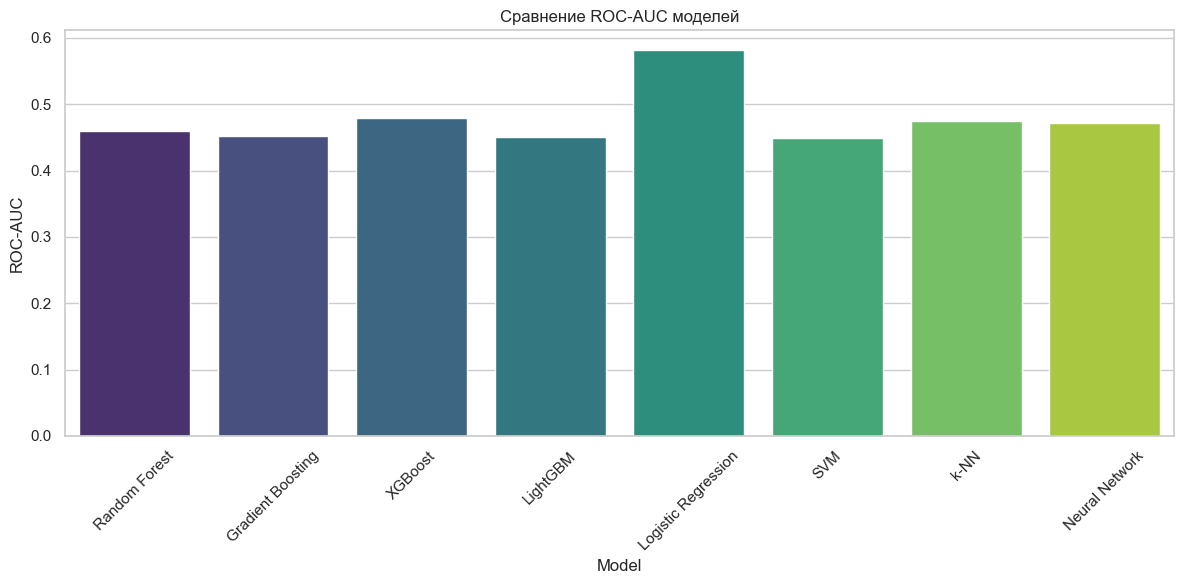

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка предобработанных данных
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Определение моделей для тестирования
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(max_depth=5, num_leaves=31, min_data_in_leaf=20, scale_pos_weight=1.5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Стандартизация признаков
scaler = StandardScaler()

# Инициализация списка для результатов
results = []

# Оценка каждой модели
for name, model in models.items():
    print(f"\nTraining {name}...")
    if name in ["Logistic Regression", "SVM", "k-NN", "Neural Network"]:
        pipeline = Pipeline([("scaler", scaler), ("model", model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    
    # Расчет метрик
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Сохранение результатов
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc_auc,
        "Cross-Val Accuracy Mean": np.mean(cross_val_scores),
        "Cross-Val Accuracy Std": np.std(cross_val_scores)
    })
    
    print(f"Accuracy: {acc}")
    print(f"ROC-AUC: {roc_auc}")
    print("Classification Report:")
    print(pd.DataFrame(report).transpose())

# Визуализация результатов
plt.figure(figsize=(12, 6))
results_df = pd.DataFrame(results)
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Сравнение точности моделей")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_accuracy_comparison.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="viridis")
plt.title("Сравнение ROC-AUC моделей")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_roc_auc_comparison.png', dpi=300)
plt.show()

Эксперимент 2: Фокус на ключевых метриках классификации

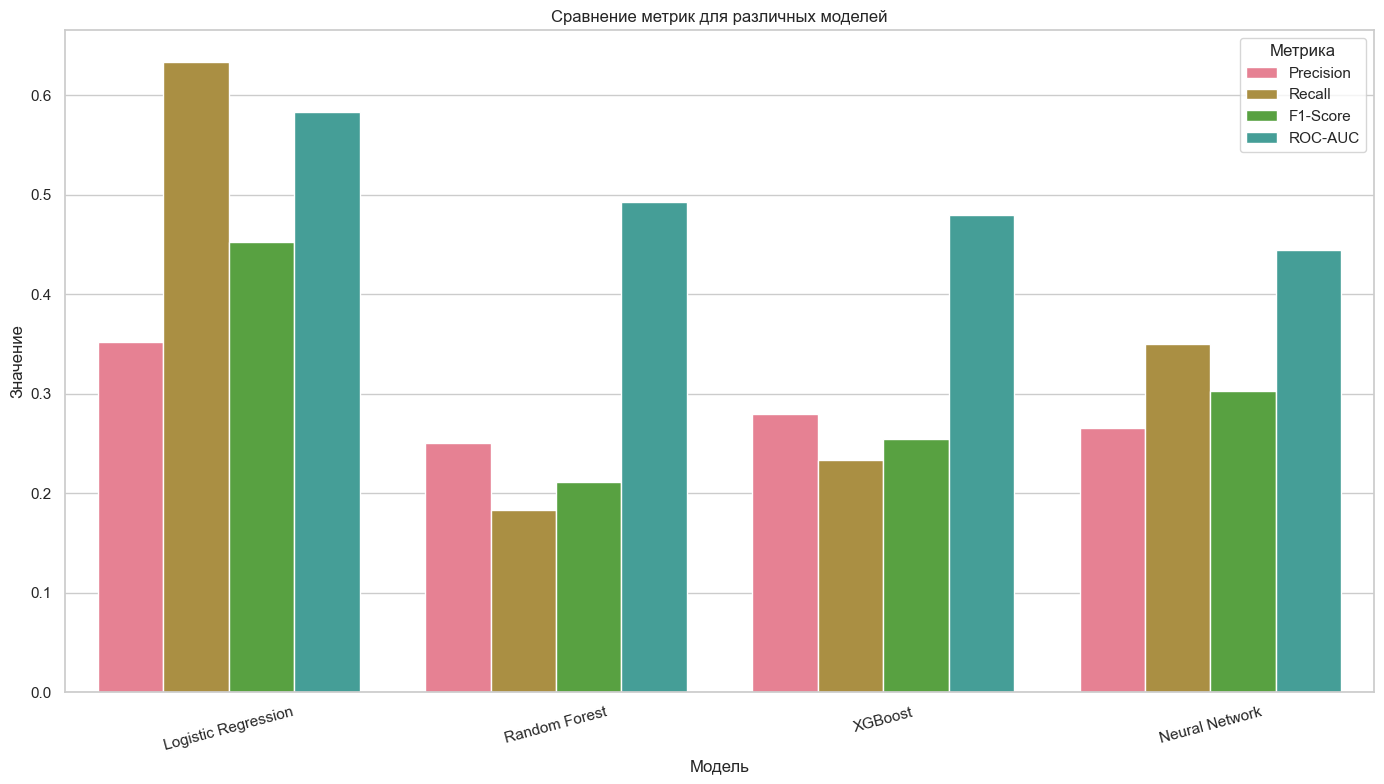

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Загрузка подготовленных данных
X_train_final = pd.read_csv('X_train.csv')
X_test_final = pd.read_csv('X_test.csv')
y_train_final = pd.read_csv('y_train.csv').values.ravel()
y_test_final = pd.read_csv('y_test.csv').values.ravel()

# Словарь для хранения моделей
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Словарь для результатов
results = {}

# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]
    
    precision = precision_score(y_test_final, y_pred)
    recall = recall_score(y_test_final, y_pred)
    f1 = f1_score(y_test_final, y_pred)
    roc_auc = roc_auc_score(y_test_final, y_pred_proba)
    
    results[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Визуализация результатов
results_df = pd.DataFrame(results).T.reset_index()
results_df = pd.melt(results_df, id_vars=['index'], value_vars=['Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
results_df.columns = ['Модель', 'Метрика', 'Значение']

plt.figure(figsize=(14, 8))
sns.barplot(x='Модель', y='Значение', hue='Метрика', data=results_df)
plt.title('Сравнение метрик для различных моделей')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300)
plt.show()

In [101]:
# Обучение и тестирование модели

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle

# Загрузка данных
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели с оптимизированными гиперпараметрами
# Используем класс-весовой коэффициент для повышения чувствительности к классу отказов
model = LogisticRegression(
    C=0.8,                  # Параметр регуляризации
    class_weight='balanced', # Учитываем дисбаланс классов
    max_iter=1000,          # Достаточное количество итераций для сходимости
    random_state=42
)

# Обучение модели
model.fit(X_train_scaled, y_train)

# Оценка на тестовых данных
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Расчет метрик
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Сохранение модели и скейлера для последующего использования
with open('failure_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
with open('feature_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Анализ важности признаков
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance_sorted = feature_importance.sort_values('Absolute_Coefficient', ascending=False)
print("\nTop 10 most important features:")
print(feature_importance_sorted.head(10))

Precision: 0.3486
Recall: 0.6333
F1-Score: 0.4497
ROC-AUC: 0.5824

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.49      0.60       140
           1       0.35      0.63      0.45        60

    accuracy                           0.54       200
   macro avg       0.55      0.56      0.52       200
weighted avg       0.64      0.54      0.55       200


Top 10 most important features:
                     Feature  Coefficient  Absolute_Coefficient
5          Machine_Type_Mill        -0.15                  0.15
7     Vibration_rolling_mean        -0.11                  0.11
1                  Vibration         0.06                  0.06
4         Machine_Type_Lathe        -0.05                  0.05
6   Temperature_rolling_mean        -0.04                  0.04
0                Temperature         0.03                  0.03
11                     PCA_2         0.03                  0.03
8   Power_Usage_rolling_mean        -0

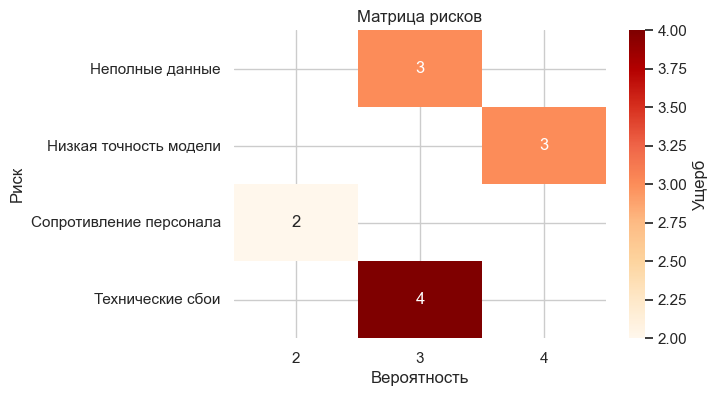

In [102]:
# HEATMAP РИСКОВ

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Риски
risks = ['Технические сбои', 'Низкая точность модели', 'Сопротивление персонала', 'Неполные данные']
severity = [4, 3, 2, 3]     # Ущерб: от 1 (низкий) до 5 (высокий)
probability = [3, 4, 2, 3]  # Вероятность: от 1 до 5

# Создание DataFrame
risk_df = pd.DataFrame({'Риск': risks, 'Ущерб': severity, 'Вероятность': probability})

# Построение
plt.figure(figsize=(6,4))
heatmap_data = pd.pivot_table(risk_df, values='Ущерб', index='Риск', columns='Вероятность')
sns.heatmap(heatmap_data, annot=True, cmap='OrRd', cbar_kws={'label': 'Ущерб'})
plt.title('Матрица рисков')
plt.show()

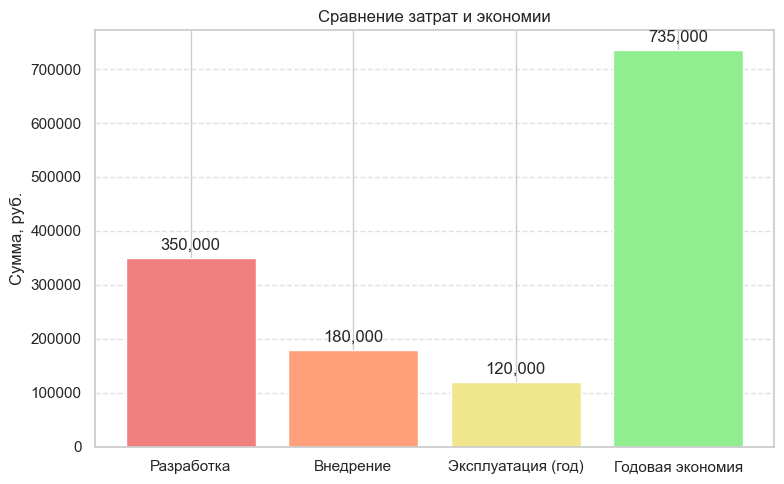

In [103]:
# СРАВНЕНИЕ ЗАТРАТ И ЭКОНОМИИ

import matplotlib.pyplot as plt

labels = ['Разработка', 'Внедрение', 'Эксплуатация (год)', 'Годовая экономия']
values = [350000, 180000, 120000, 735000]

colors = ['lightcoral', 'lightsalmon', 'khaki', 'lightgreen']

plt.figure(figsize=(8,5))
bars = plt.bar(labels, values, color=colors)
plt.title('Сравнение затрат и экономии')
plt.ylabel('Сумма, руб.')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Добавление подписей
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 15000, f'{yval:,}', ha='center')

plt.tight_layout()
plt.show()

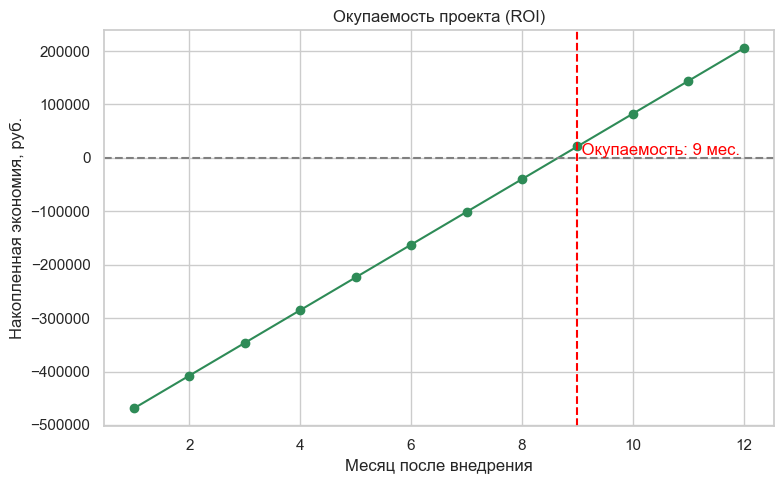

In [104]:
# ГРАФИК ОКУПАЕМОСТИ (ROI)

import numpy as np

# Параметры
months = np.arange(1, 13)
initial_investment = 530000  # разработка + внедрение
monthly_savings = 735000 / 12
cumulative = np.cumsum([monthly_savings] * 12) - initial_investment

plt.figure(figsize=(8,5))
plt.plot(months, cumulative, marker='o', color='seagreen')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Окупаемость проекта (ROI)')
plt.xlabel('Месяц после внедрения')
plt.ylabel('Накопленная экономия, руб.')
plt.grid(True)

# Отметка точки окупаемости
roi_month = next((m for m, val in zip(months, cumulative) if val >= 0), None)
if roi_month:
    plt.axvline(roi_month, color='red', linestyle='--')
    plt.text(roi_month, 0, f' Окупаемость: {roi_month} мес.', color='red', verticalalignment='bottom')

plt.tight_layout()
plt.show()

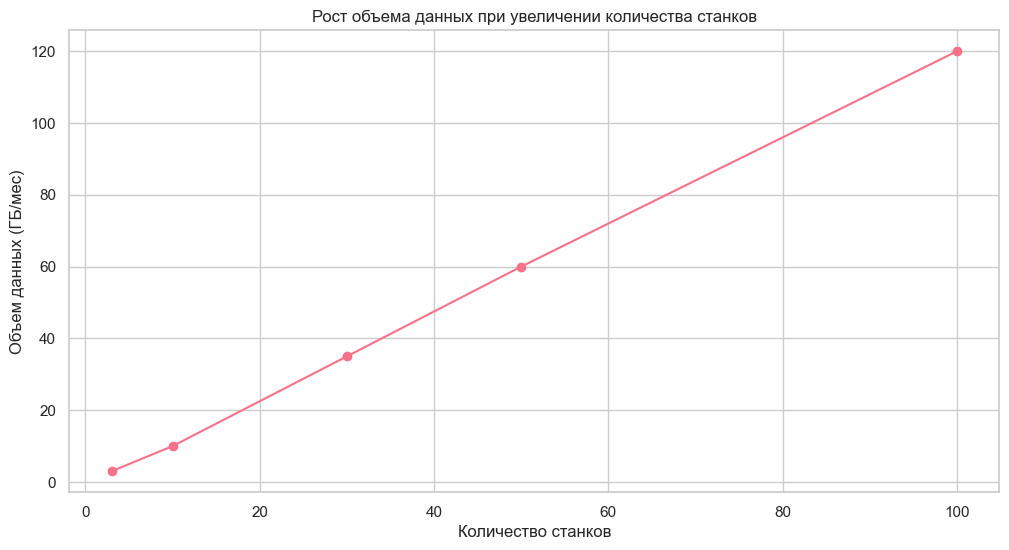

In [105]:
# Рост объема данных при масштабировании

import matplotlib.pyplot as plt

machines = [3, 10, 30, 50, 100]
data_volume = [3, 10, 35, 60, 120]  # Условные объемы (ГБ/мес)

plt.plot(machines, data_volume, marker='o')
plt.title('Рост объема данных при увеличении количества станков')
plt.xlabel('Количество станков')
plt.ylabel('Объем данных (ГБ/мес)')
plt.grid(True)
plt.show()

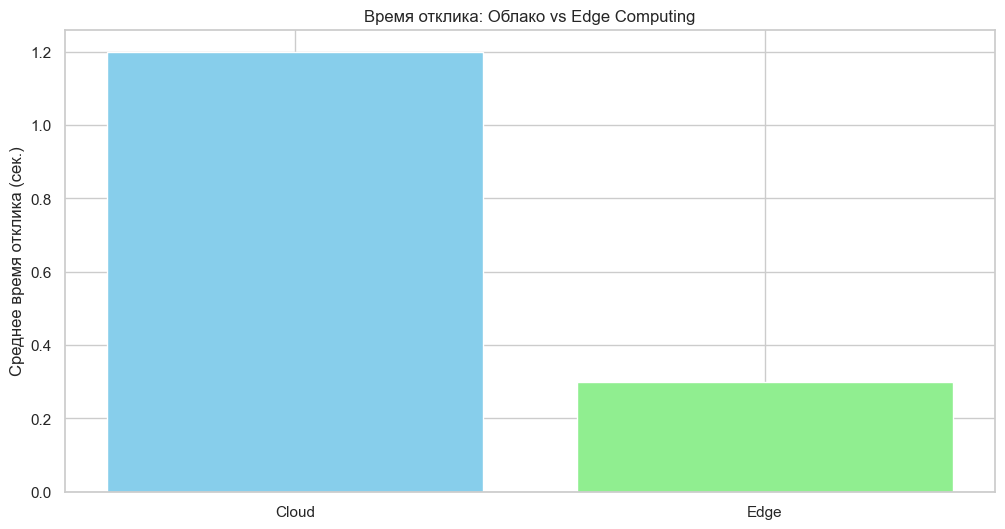

In [106]:
# Сравнение отклика (Edge vs Cloud)

import matplotlib.pyplot as plt

methods = ['Cloud', 'Edge']
response_time = [1.2, 0.3]  # Время в секундах

plt.bar(methods, response_time, color=['skyblue', 'lightgreen'])
plt.title('Время отклика: Облако vs Edge Computing')
plt.ylabel('Среднее время отклика (сек.)')
plt.show()

In [ ]:
# Код для сохранения артефактов
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Загрузка подготовленных данных
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели (Логистическая регрессия)
model = LogisticRegression(
    C=0.8,
    class_weight='balanced',  # Учитываем дисбаланс классов
    max_iter=1000,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Оценка на тестовых данных
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Расчет метрик
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Сохранение модели и скейлера для последующего использования
with open('failure_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('feature_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Сохранение признаков 
model_features = X_train.columns.tolist()
with open('model_features.pkl', 'wb') as file:
    pickle.dump(model_features, file)

print("✅ Все артефакты успешно сохранены.")



✅ Все артефакты успешно сохранены.
